In [35]:
import ast
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt  
import csv
import collections
from collections import Counter
import os
import pytz
from datetime import datetime
from ChemicalCase import ChemicalCase
import pandas as pd

In [36]:
df = pd.read_csv("gckpp_EdgeList.csv")
B = nx.DiGraph()
B.add_edges_from([(df["from"][i],df["to"][i]) for i in range(0,len(df["to"]))])

**Pathway + Timescale Extraction**

In [37]:
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing_L1_2018/'
file_list = sorted(os.listdir(directory))

with open('Beijing2018ISOP.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'chemical_pathway', 'timescale'])

    for filename in file_list:
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            amazon_surface = ChemicalCase(filepath)

            for i in range(1, 914):
                # For all edges coming in and out of a reaction node, set to half the reaction timescale
                for u, v in B.in_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)
                for u, v in B.out_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)

            # Calculate the shortest path and timescale between NO and O3
            if nx.has_path(B, source="ISOP", target="O3"):
                o3_path = nx.shortest_path(B, source="ISOP", target="O3", weight='timescale')
                o3_timescale = nx.path_weight(B, o3_path, weight='timescale')

                writer.writerow([filename, o3_path, o3_timescale])
                print(f"\n{filename}:")
                print("\nChemical Pathway:", o3_path)
                print("\nTimescale value:", o3_timescale)


Beijing_L1_20180101_2100.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 6670.7218488169965

Beijing_L1_20180101_2130.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 6864.1376808245

Beijing_L1_20180101_2145.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 6950.91139244124

Beijing_L1_20180101_2200.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 7037.397230597628

Beijing_L1_20180102_0030.txt:

Chemical Pathway: ['ISOP', 'R397', 'IHOO1', 'R420', 'NO2', 'R760', 'O', 'R200', 'O3']

Timescale value: 0.01249982181317534

Beijing_L1_20180102_0045.txt:

Chemical Pathway: ['ISOP', 'R397', 'IHOO1', 'R420', 'NO2', 'R760', 'O', 'R200', 'O3']

Timescale value: 0.00909634454807911

Beijing_L1_20180102_0100.txt:

Chemical Pathway: ['ISOP', 'R397', 'IHOO1', 'R420', 'NO2', 'R760', 'O', 'R200', 'O3']

Timescale value: 0.006988630706205917

Beijing_L1_20180102_0115.txt:

Chemi

In [ ]:
import os
import csv
import networkx as nx
import pandas as pd
from ChemicalCase import ChemicalCase  # Assuming you have this class imported or defined

# Directory containing the .txt files
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing_L1_2018/'
file_list = sorted(os.listdir(directory))

# Create and write to the CSV file
with open('Beijing2018ISOP_all_paths.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'chemical_pathway', 'timescale'])

    # Loop through the .txt files in the directory
    for filename in file_list:
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            amazon_surface = ChemicalCase(filepath)  # Assuming ChemicalCase class handles the data parsing

            # Assuming 'reaction_rates' is part of the ChemicalCase class or data source
            for i in range(1, 914):
                # Set the reaction timescale for all edges in and out of each reaction node
                for u, v in B.in_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)
                for u, v in B.out_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)

            # Find all paths from ISOP to O3
            if nx.has_path(B, source="ISOP", target="O3"):
                all_paths = list(nx.all_simple_paths(B, source="ISOP", target="O3"))

                # Loop through all paths and calculate the timescale for each
                for path in all_paths:
                    # Calculate the timescale for the current path
                    path_timescale = sum(B[path[i]][path[i + 1]]['timescale'] for i in range(len(path) - 1))

                    # Write the results to the CSV file
                    writer.writerow([filename, str(path), path_timescale])
                    print(f"\n{filename}:")
                    print("\nChemical Pathway:", path)
                    print("\nTimescale value:", path_timescale)


In [34]:
import os
import csv
import networkx as nx
from ChemicalCase import ChemicalCase  # Assuming you have this class imported or defined

# Directory containing the .txt files
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing_L1_2018/'
file_list = sorted(os.listdir(directory))

# Create and write to the CSV file
with open('Beijing2018ISOP_all_paths.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'chemical_pathway', 'timescale'])

    # Loop through the .txt files in the directory
    for filename in file_list:
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            amazon_surface = ChemicalCase(filepath)  # Assuming ChemicalCase class handles the data parsing

            # Assuming 'reaction_rates' is part of the ChemicalCase class or data source
            for i in range(1, 914):
                # Set the reaction timescale for all edges in and out of each reaction node
                for u, v in B.in_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)
                for u, v in B.out_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)

                # Example: add edges based on reactions (replace with your actual logic)
                # B.add_edge("ISOP", "R" + str(i), timescale=some_timescale)
                # B.add_edge("R" + str(i), "O3", timescale=some_other_timescale)

            # Debug: Check the nodes in the graph
            print(f"Nodes in the graph for {filename}: {list(B.nodes)}")

            # Check if "ISOP" and "O3" are in the graph
            if "ISOP" not in B.nodes or "O3" not in B.nodes:
                print(f"Warning: 'ISOP' or 'O3' is missing from the graph in {filename}.")
                continue

            # Find all paths from ISOP to O3
            if nx.has_path(B, source="ISOP", target="O3"):
                all_paths = list(nx.all_simple_paths(B, source="ISOP", target="O3"))

                # Loop through all paths and calculate the timescale for each
                for path in all_paths:
                    # Calculate the timescale for the current path
                    path_timescale = sum(B[path[i]][path[i + 1]]['timescale'] for i in range(len(path) - 1))

                    # Write the results to the CSV file
                    writer.writerow([filename, str(path), path_timescale])
                    print(f"\n{filename}:")
                    print("\nChemical Pathway:", path)
                    print("\nTimescale value:", path_timescale)


NodeNotFound: Either source ISOP or target O3 is not in G

**Pathway + BWC Extaction**

In [11]:
bc = nx.betweenness_centrality(B, k=None, normalized=True, weight=None, endpoints=False, seed=None)
print(bc)

{'R1': 0.0006549785554804022, 'LOx': 0.0, 'PSO4': 0.0, 'SO4': 0.005841885752832273, 'SALAAL': 0.0, 'O3': 0.0359295452085903, 'SO2': 0.007381904250675339, 'R2': 0.0018578848647687063, 'HCl': 0.020718762875197493, 'SALACL': 0.0018474421057082194, 'R3': 0.0012161671103988311, 'NIT': 0.003313573898887956, 'HNO3': 0.04226192075667849, 'R4': 0.00035349187386989777, 'SO4s': 0.0, 'SALCAL': 0.0, 'R5': 0.0022608420639595775, 'SALCCL': 0.0022503993048990905, 'R6': 0.001351434005826464, 'NITs': 0.0034488407943155885, 'R7': 0.00012225143333093822, 'H2O2': 0.005141983158816767, 'R8': 0.0001153620929871682, 'R9': 4.213420412087383e-05, 'R10': 0.0016375812326587212, 'HMS': 0.001627138473598237, 'CH2O': 0.028949643592742127, 'R11': 0.0007158160438611053, 'R12': 0.0020173264575443356, 'OH': 0.4044463376921676, 'R13': 0.00013669347352154336, 'NO2': 0.14537351786123917, 'NO': 0.07978409718981708, 'R14': 0.000557375602965139, 'HO2': 0.3058456367767745, 'R15': 0.0024684826035506376, 'R16': 0.004001824527952

In [23]:
df = pd.read_csv("gckpp_EdgeList.csv")
B = nx.DiGraph()
B.add_edges_from([(df["from"][i],df["to"][i]) for i in range(0,len(df["to"]))])

In [26]:
import os
import csv
import networkx as nx
from ChemicalCase import ChemicalCase  # Assuming you have this class imported or defined

# Directory containing the .txt files
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing_L1_2018/'
file_list = sorted(os.listdir(directory))

# Create and write to the CSV file
with open('Beijing2018ISOPNew.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'chemical_pathway', 'timescale'])

    # Loop through the .txt files in the directory
    for filename in file_list:
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            amazon_surface = ChemicalCase(filepath)  # Assuming ChemicalCase class handles the data parsing

            # Create the graph object (assuming you need a graph like in your example)
            B = nx.DiGraph()

            # Assuming 'reaction_rates' is part of the ChemicalCase class or data source
            for i in range(1, 914):
                # Set the reaction timescale for all edges in and out of each reaction node
                for u, v in B.in_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)
                for u, v in B.out_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)

            # Debug: Check the nodes in the graph
            print(f"Nodes in the graph for {filename}: {list(B.nodes)}")

            # Check if "ISOP" and "O3" are in the graph
            if "ISOP" not in B.nodes or "O3" not in B.nodes:
                print(f"Warning: 'ISOP' or 'O3' is missing from the graph in {filename}.")
                continue

            # Find all paths from ISOP to O3
            if nx.has_path(B, source="ISOP", target="O3"):
                all_paths = list(nx.all_simple_paths(B, source="ISOP", target="O3"))

                # Loop through all paths and calculate the timescale for each
                for path in all_paths:
                    # Calculate the timescale for the current path
                    path_timescale = sum(B[path[i]][path[i + 1]]['timescale'] for i in range(len(path) - 1))

                    # Write the results to the CSV file
                    writer.writerow([filename, str(path), path_timescale])
                    print(f"\n{filename}:")
                    print("\nChemical Pathway:", path)
                    print("\nTimescale value:", path_timescale)


Nodes in the graph for Beijing_L1_20180101_2100.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180101_2130.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180101_2145.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180101_2200.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0030.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0045.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0100.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0115.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0130.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0145.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0200.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0215.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0300.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0315.txt: ['ISOP', 'O3']
Nodes in the graph for Beijing_L1_20180102_0330.

In [25]:
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing_L1_2018/'
file_list = sorted(os.listdir(directory))

with open('Beijing2018ISOP_BCTEST.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'chemical_pathway', 'timescale', 'betweenness_centrality'])

    for filename in file_list:
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            amazon_surface = ChemicalCase(filepath)

            for i in range(1, 914):
                # For all edges coming in and out of a reaction node, set to half the reaction timescale
                for u, v in B.in_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)
                for u, v in B.out_edges("R" + str(i)):
                    B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)

            # Calculate the shortest path and timescale between ISOP and O3
            if nx.has_path(B, source="ISOP", target="O3"):
                o3_path = nx.shortest_path(B, source="ISOP", target="O3", weight='timescale')
                o3_timescale = nx.path_weight(B, o3_path, weight='timescale')

                # betweenness centrality for the graph
                subgraph = B.subgraph(o3_path)
                betweenness = nx.betweenness_centrality(subgraph, endpoints=False)

                # Get the betweenness centrality for the nodes in the path
                path_betweenness = [betweenness.get(node, 0) for node in o3_path]

                # Add average betweenness centrality for the path (normalization)
                # avg_betweenness = sum(path_betweenness) / len(path_betweenness) if path_betweenness else 0

                writer.writerow([filename, o3_path, o3_timescale,  path_betweenness])
                print(f"\n{filename}:")
                print("\nChemical Pathway:", o3_path)
                print("\nTimescale value:", o3_timescale)
                print("\nBetweenness Centrality:", path_betweenness) 


Beijing_L1_20180101_2100.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 6670.7218488169965

Betweenness Centrality: [0.0, 0.5, 0.41666666666666663, 0.3333333333333333, 0.25]

Beijing_L1_20180101_2130.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 6864.1376808245

Betweenness Centrality: [0.0, 0.5, 0.41666666666666663, 0.3333333333333333, 0.25]

Beijing_L1_20180101_2145.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 6950.91139244124

Betweenness Centrality: [0.0, 0.5, 0.41666666666666663, 0.3333333333333333, 0.25]

Beijing_L1_20180101_2200.txt:

Chemical Pathway: ['ISOP', 'R396', 'HO2', 'R598', 'O3']

Timescale value: 7037.397230597628

Betweenness Centrality: [0.0, 0.5, 0.41666666666666663, 0.3333333333333333, 0.25]

Beijing_L1_20180102_0030.txt:

Chemical Pathway: ['ISOP', 'R397', 'IHOO1', 'R420', 'NO2', 'R760', 'O', 'R200', 'O3']

Timescale value: 0.01249982181317534

Betweenness Centr

**BC FREQUENCY**

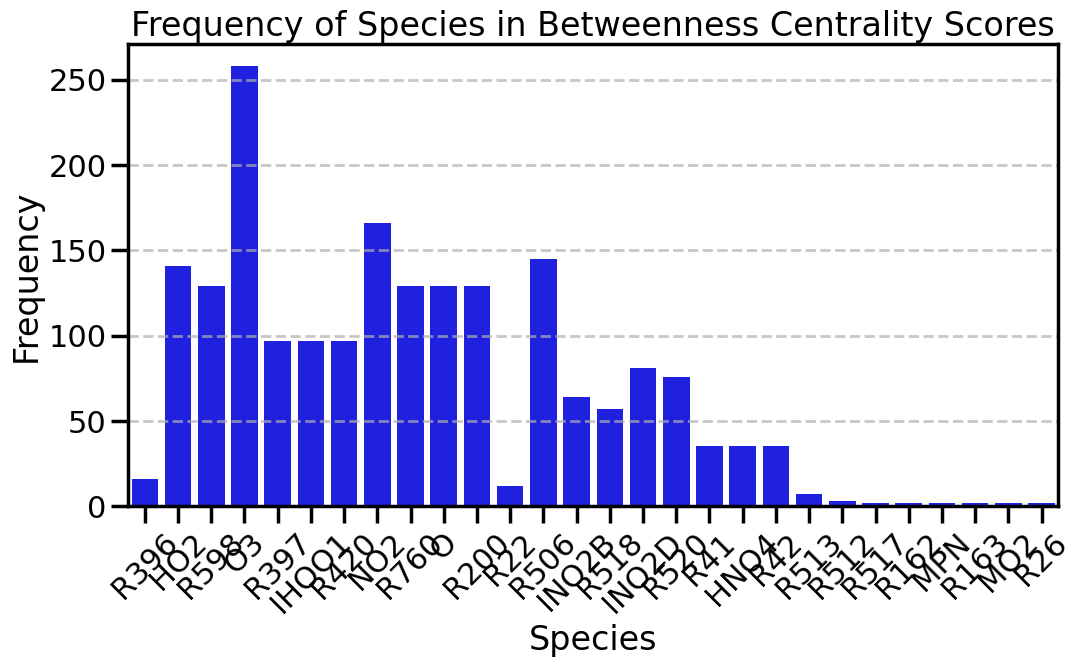

In [15]:
# - [ ] We wanta HISTOGRAM
#     - [ ] Species on X, Frequency on Y
#     - [ ] We want the number of times a species appears on a centrality score
#     - [ ] BC scores each vertex, one w the largest score

species_counts = Counter()
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BC.csv'
df = pd.read_csv(directory) 
    
for _, row in df.iterrows():
    pathway = ast.literal_eval(row["chemical_pathway"])
    centralities = ast.literal_eval(row["betweenness_centrality"])
        
    for species, centrality in zip(pathway, centralities):
        if centrality > 0:
            species_counts[species] += 1

plt.figure(figsize=(12, 6))
sns.barplot(x=list(species_counts.keys()), y=list(species_counts.values()), color='blue')
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.title("Frequency of Species in Betweenness Centrality Scores")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**BC SUM**

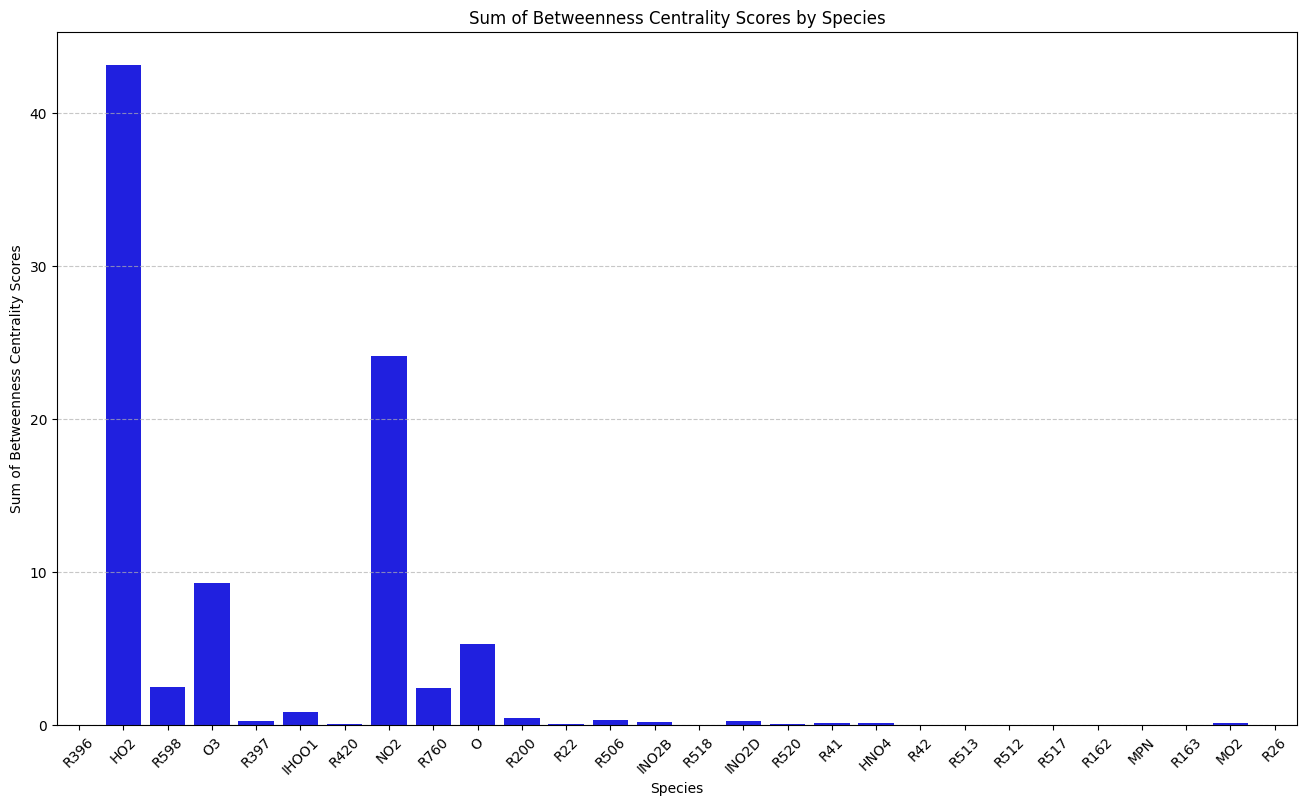

In [3]:
from collections import defaultdict
file_path= '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BC.csv'

species_bc_sum = defaultdict(float)
    
df = pd.read_csv(file_path)
    
for _, row in df.iterrows():
    pathway = ast.literal_eval(row["chemical_pathway"])
    centralities = ast.literal_eval(row["betweenness_centrality"])
        
    for species, centrality in zip(pathway, centralities):
        if centrality > 0:
            species_bc_sum[species] += centrality
plt.figure(figsize=(16, 9))
sns.barplot(x=list(species_bc_sum.keys()), y=list(species_bc_sum.values()), color='blue')
plt.xlabel("Species")
plt.ylabel("Sum of Betweenness Centrality Scores")
plt.title("Sum of Betweenness Centrality Scores by Species")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("SumBCTest.png")
plt.show()

**Time Series**

In [14]:
# # create a new DF to get filename, HO2, & HO2 score:
# # Load the Beijing CSV file
# beijing_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BC.csv'  # Update with actual file path
# beijing_data = pd.read_csv(beijing_file_path)

# # Convert Chemical Pathway column from string to list (if necessary)
# beijing_data['Chemical Pathway'] = beijing_data['chemical_pathway'].apply(eval)

# # Check if HO2 is present in the Chemical Pathway
# beijing_data['HO2_Present'] = beijing_data['chemical_pathway'].apply(lambda x: 'HO2' in x)

# # Extract BC score for HO2 if present
# def get_ho2_bc(row):
#     if row['HO2_Present']:
#         ho2_index = row['Chemical Pathway'].index('HO2')  # Find index of HO2
#         return eval(row['betweenness_centrality'])[ho2_index]  # Get corresponding BC score
#     return None

# beijing_data['BC_HO2'] = beijing_data.apply(get_ho2_bc, axis=1)

# # Create new DataFrame with only relevant columns
# ho2_bc_df = beijing_data[['filename', 'BC_HO2']].dropna()
# print(ho2_bc_df)

ValueError: 'NO2' is not in list

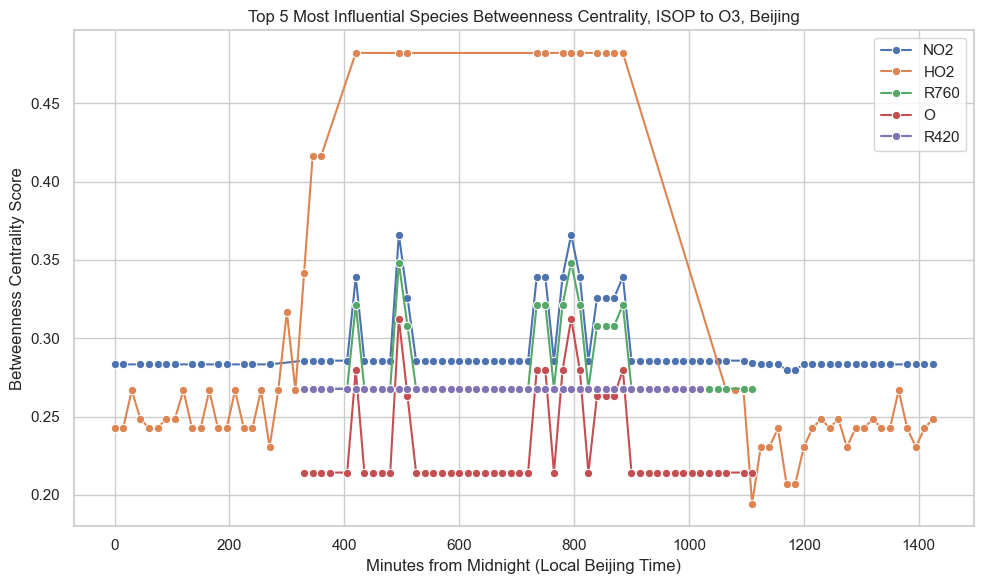

Beijing BC time series plots for top 5 species completed.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz
from collections import defaultdict

# Load the Beijing CSV file
beijing_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BCTEST.csv'
beijing_data = pd.read_csv(beijing_file_path)

# Extract time and date from the filename
beijing_data['time'] = beijing_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
beijing_data['date'] = beijing_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
beijing_data['datetime_utc'] = pd.to_datetime(beijing_data['date'] + beijing_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Beijing local time (UTC+8)
beijing_tz = pytz.timezone('Asia/Shanghai')
beijing_data['datetime_local'] = beijing_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(beijing_tz)

# Extract the local hour and minute for plotting
beijing_data['time_in_minutes'] = beijing_data['datetime_local'].dt.hour * 60 + beijing_data['datetime_local'].dt.minute

# Convert Chemical Pathway column to list
beijing_data['chemical_pathway'] = beijing_data['chemical_pathway'].apply(eval)

# Calculate sum of BC scores for each species
species_bc_sum = defaultdict(float)
for _, row in beijing_data.iterrows():
    pathway = row['chemical_pathway']
    bc_scores = eval(row['betweenness_centrality'])
    for species, bc in zip(pathway, bc_scores):
        species_bc_sum[species] += bc

# Get top 5 species based on highest sum of BC
most_influential_species = sorted(species_bc_sum, key=species_bc_sum.get, reverse=True)[:5]

# Extract BC scores for top 5 most influential species
def get_bc_score(bc_list, pathway_list, species):
    try:
        index = pathway_list.index(species)
        return bc_list[index]
    except ValueError:
        return None

for species in most_influential_species:
    beijing_data[f'BC_{species}'] = beijing_data.apply(lambda row: get_bc_score(eval(row['betweenness_centrality']), row['chemical_pathway'], species), axis=1)

# Plot time series for the top 5 most influential species
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
for species in most_influential_species:
    sns.lineplot(data=beijing_data, x='time_in_minutes', y=f'BC_{species}', marker='o', label=species, errorbar=None)

plt.xlabel('Minutes from Midnight (Local Beijing Time)')
plt.ylabel('Betweenness Centrality Score')
plt.title('Top 5 Most Influential Species Betweenness Centrality, ISOP to O3, Beijing')
plt.legend()
plt.tight_layout()
plt.savefig('Beijing_Top5_BC.png')
plt.show()

print("Beijing BC time series plots for top 5 species completed.")


/var/folders/ss/_8gl3z6131gf35t5840414tc0000gn/T/ipykernel_98039/1040005929.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['hour'] = season_data['datetime_local'].dt.hour


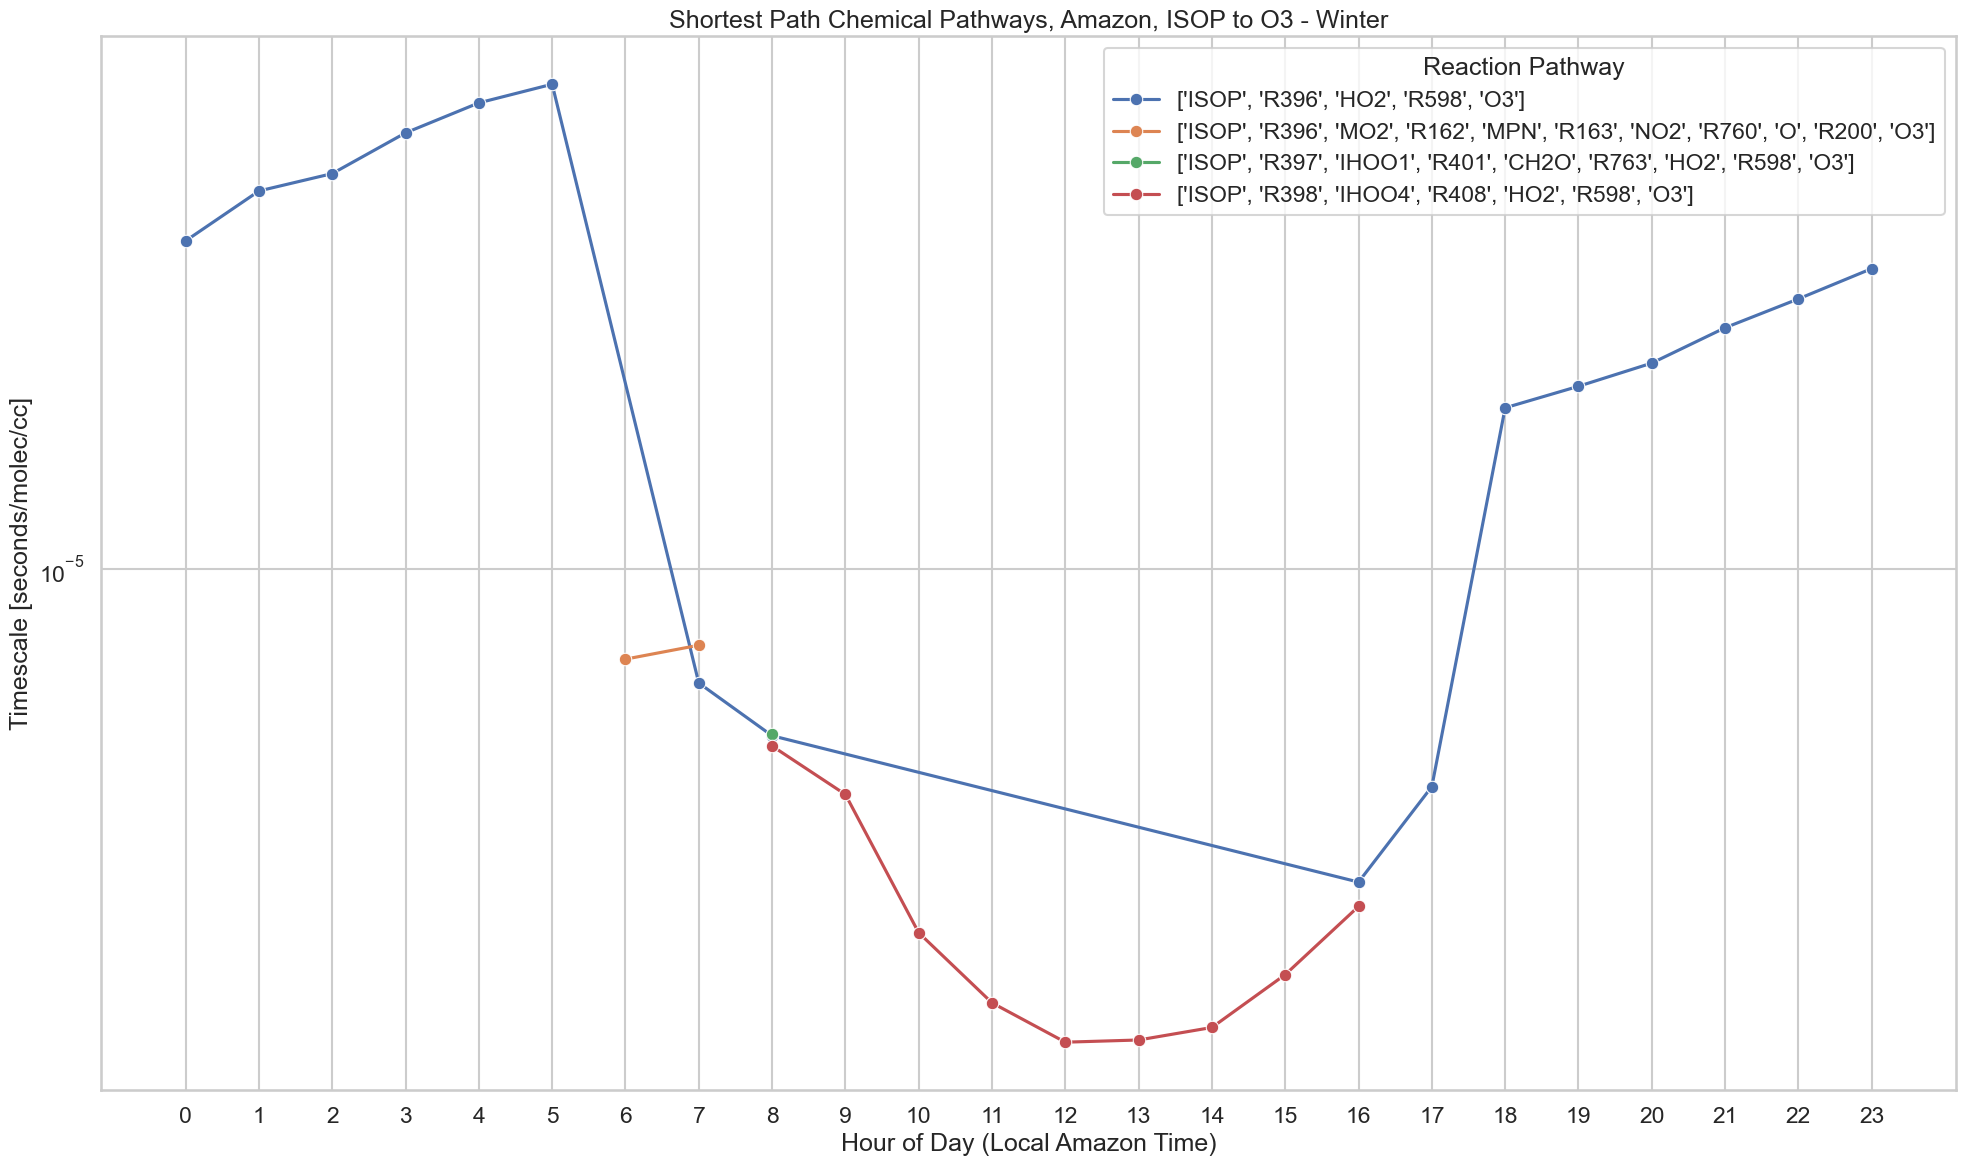

/var/folders/ss/_8gl3z6131gf35t5840414tc0000gn/T/ipykernel_98039/1040005929.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['hour'] = season_data['datetime_local'].dt.hour


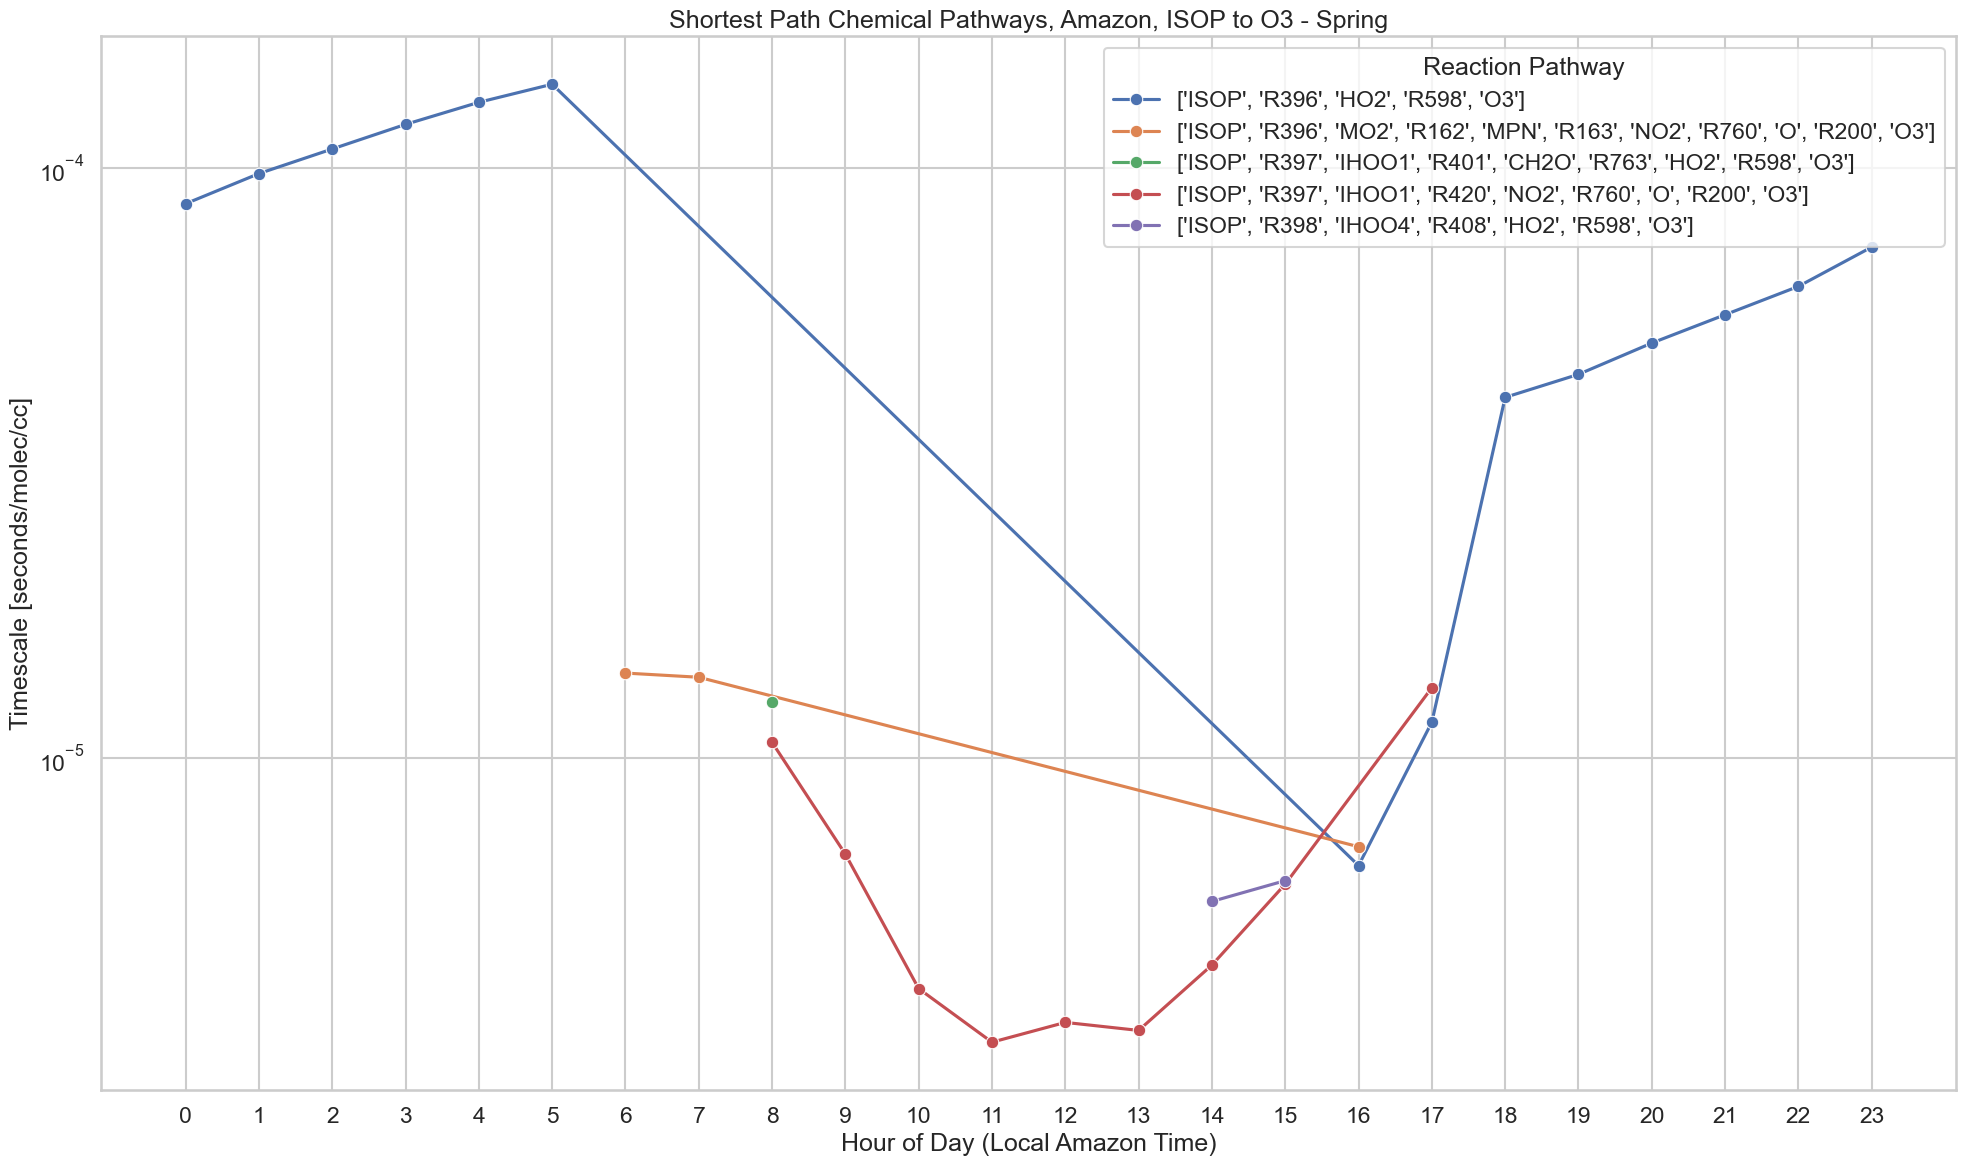

/var/folders/ss/_8gl3z6131gf35t5840414tc0000gn/T/ipykernel_98039/1040005929.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['hour'] = season_data['datetime_local'].dt.hour


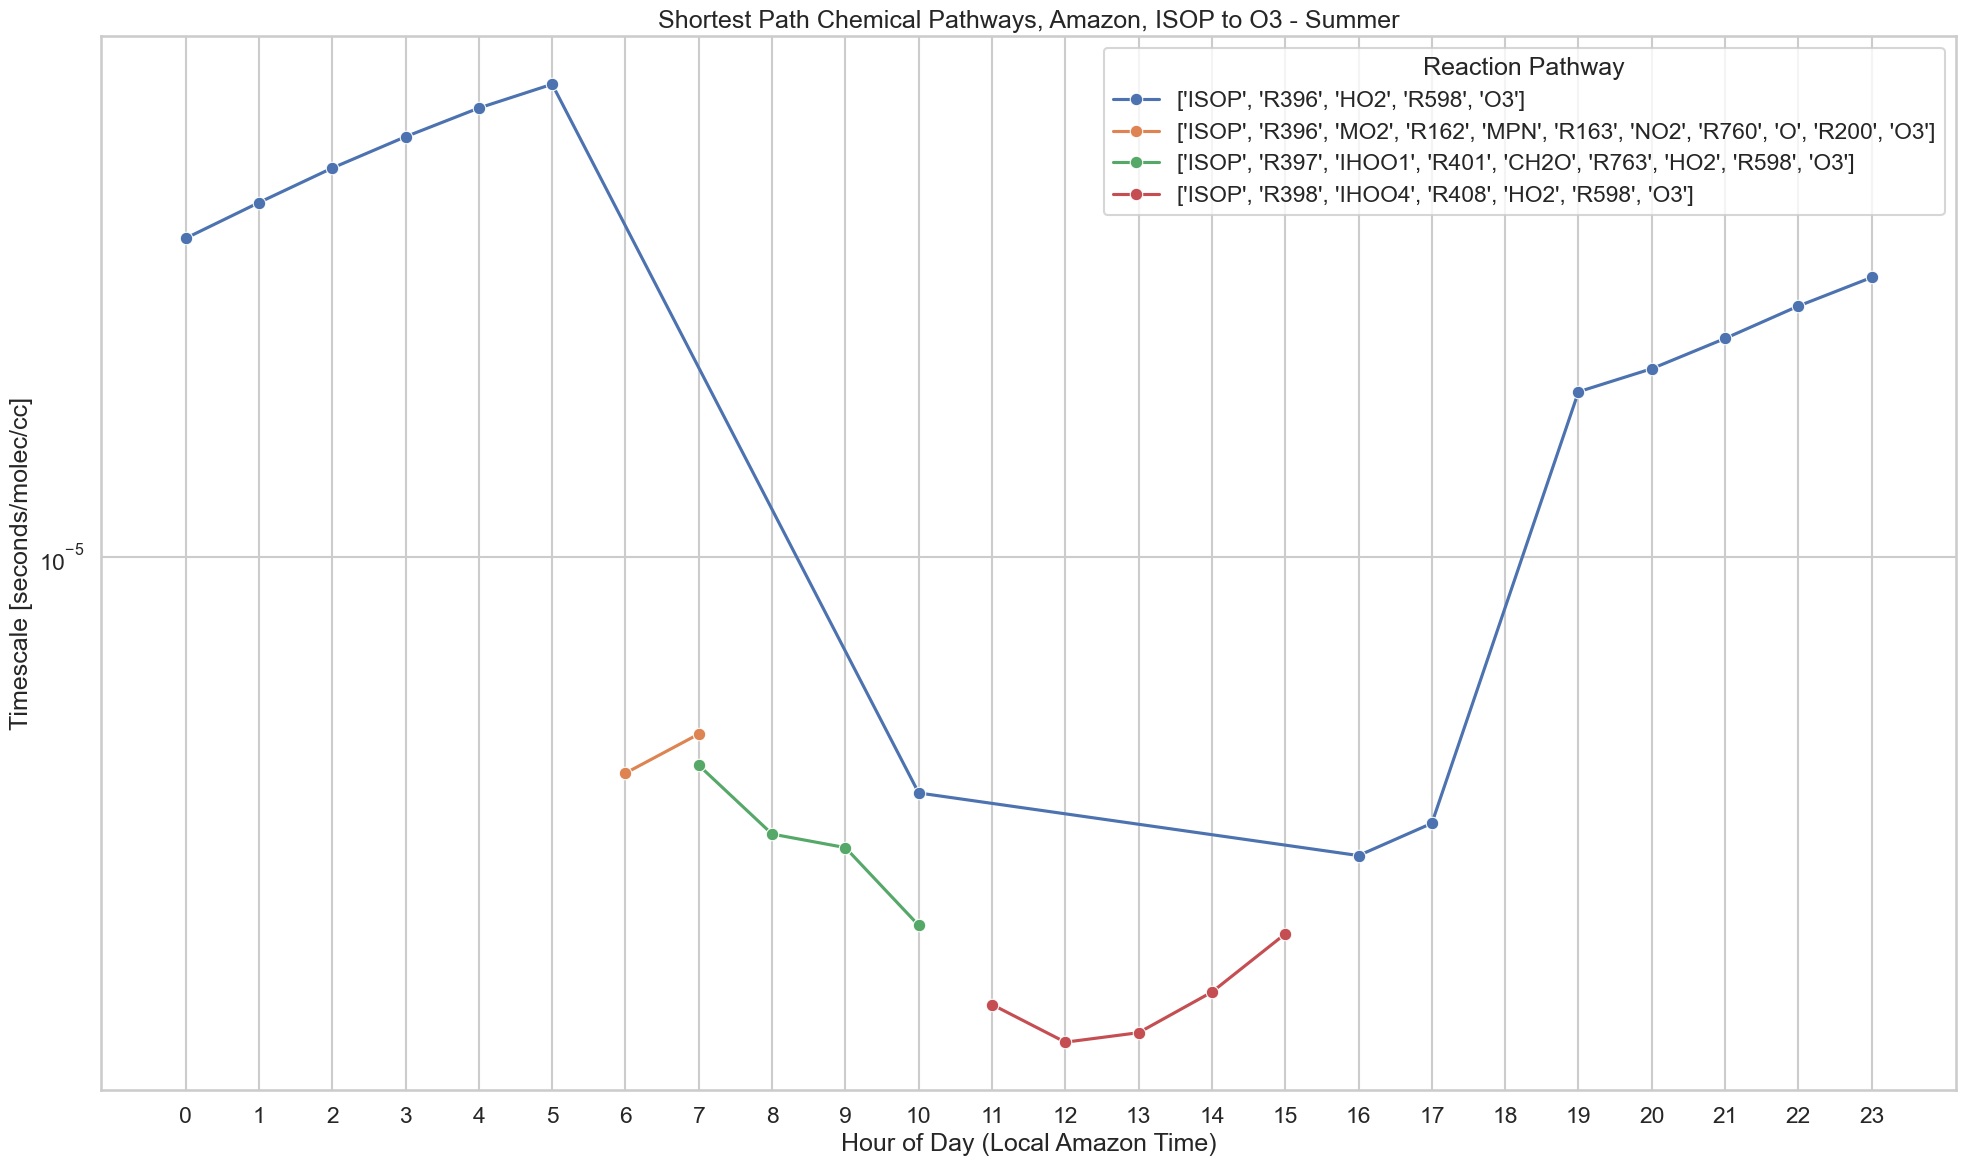

/var/folders/ss/_8gl3z6131gf35t5840414tc0000gn/T/ipykernel_98039/1040005929.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['hour'] = season_data['datetime_local'].dt.hour


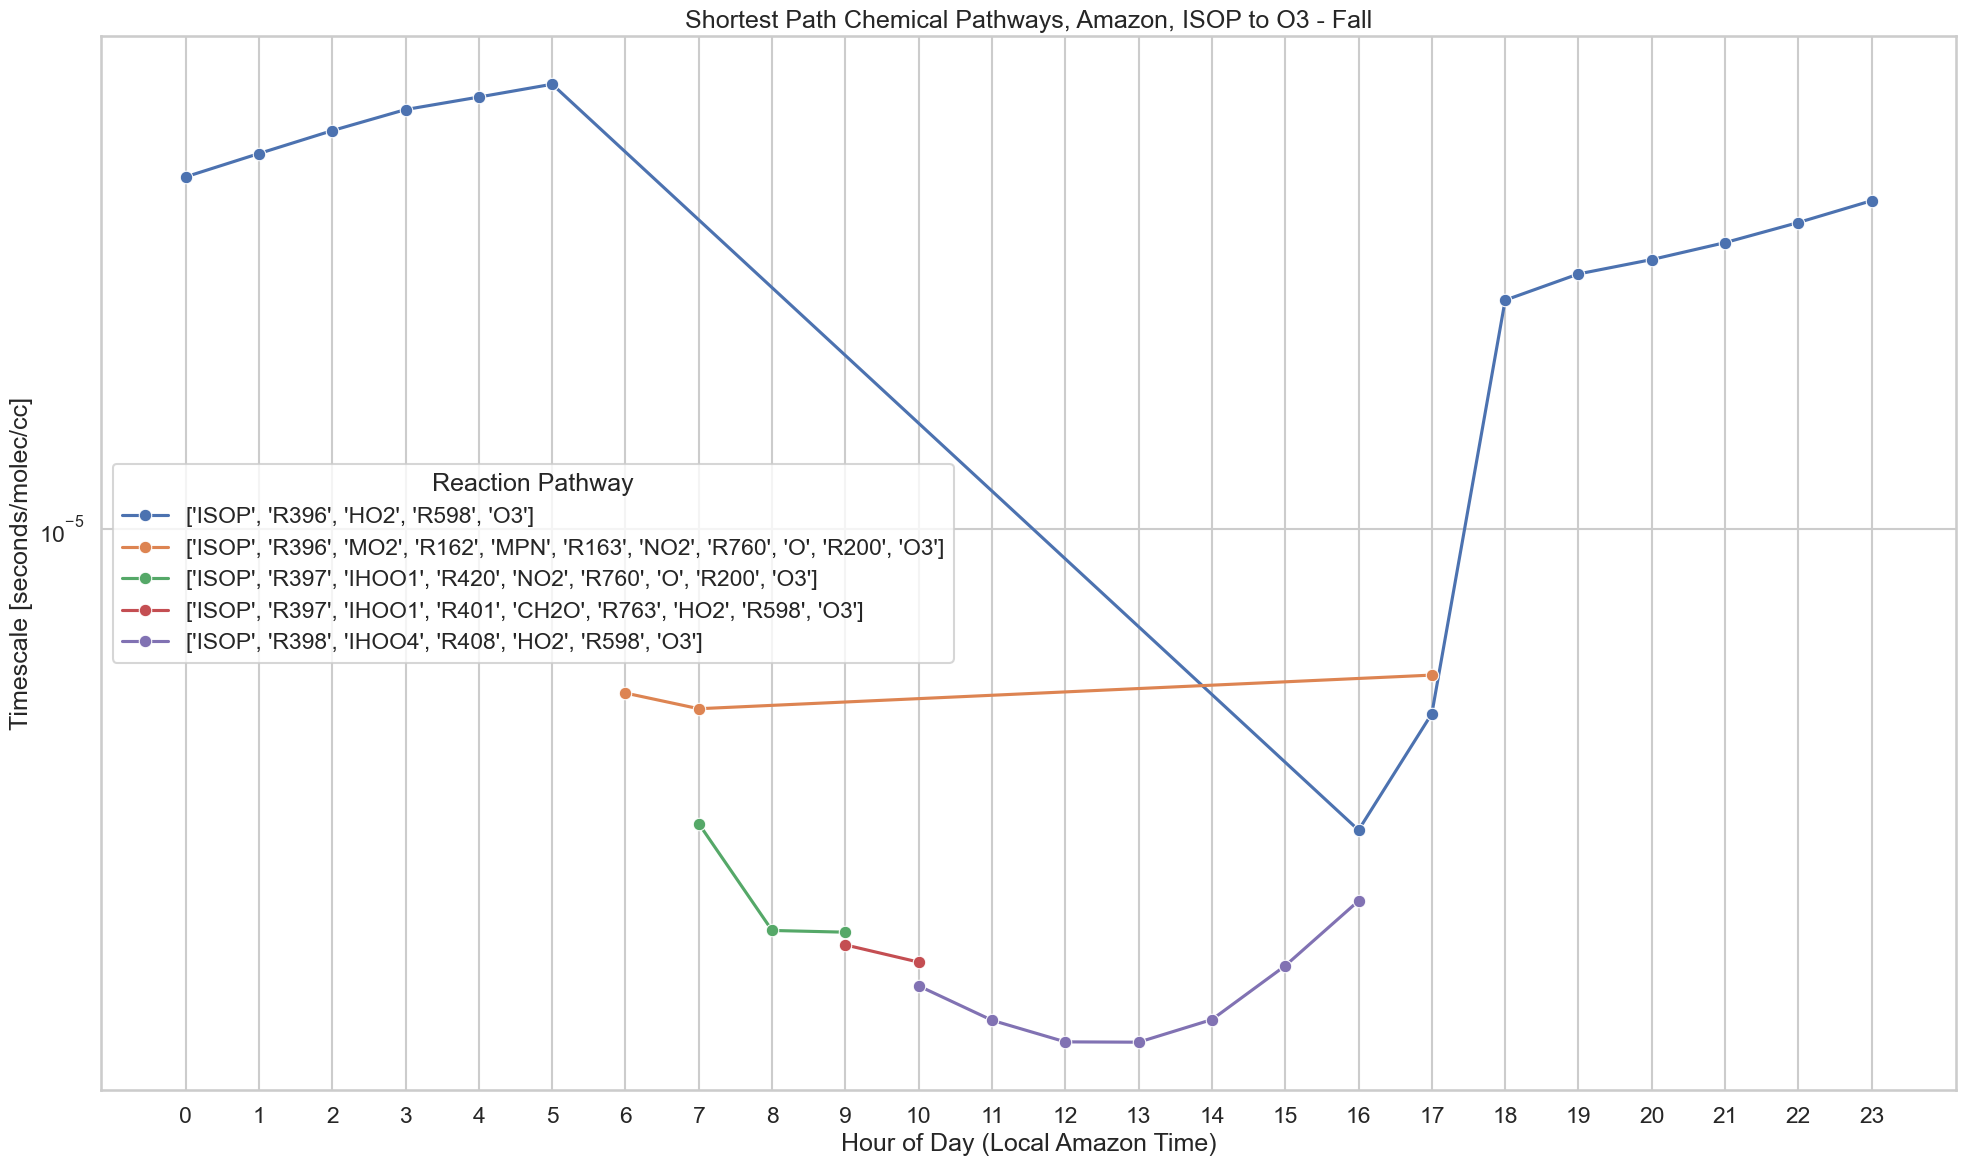

Amazon timezone conversion, heatmap, and seasonal time series plots completed.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Create presence matrix for shortest paths
shortest_paths = amazon_data.pivot_table(index='chemical_pathway', columns='season', values='timescale', aggfunc=lambda x: 1 if x.any() else 0).fillna(0)

for season in seasons:
    present_reactions = shortest_paths[season][shortest_paths[season] == 1].index
    season_data = amazon_data[(amazon_data['season'] == season) & (amazon_data['chemical_pathway'].isin(present_reactions))]

    # Extract hour from local time
    season_data['hour'] = season_data['datetime_local'].dt.hour

    # Average timescale per hour per pathway
    hourly_data = season_data.groupby(['hour', 'chemical_pathway'], as_index=False)['timescale'].mean()

    # Plot
    plt.figure(figsize=(20, 12))
    sns.lineplot(data=hourly_data, x='hour', y='timescale', hue='chemical_pathway', marker='o')
    plt.yscale('log')
    plt.xlabel('Hour of Day (Local Amazon Time)')
    plt.ylabel('Timescale [seconds/molec/cc]')
    plt.title(f'Shortest Path Chemical Pathways, Amazon, ISOP to O3 - {season}')
    plt.legend(title="Reaction Pathway")
    plt.tight_layout()
    plt.savefig(f'Seasonal_Timescales_{season}.png', bbox_inches='tight')
    plt.xticks(ticks=range(0, 24, 1))
    plt.show()


print(f"Amazon timezone conversion, heatmap, and seasonal time series plots completed.")


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the dataset
file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv' # Path to your CSV file
data = pd.read_csv(file_path)

# Process reaction data for timescale
# Assuming a 'timescale' column exists (you may need to modify this based on your actual dataset structure)
data['datetime'] = pd.to_datetime(data['timestamp'])  # Adjust this based on your timestamp column
data['hour'] = data['datetime'].dt.hour

# Example chemical pathway (Replace with actual pathways you're interested in)
reaction_paths = [
    ['ISOP', 'R396', 'HO2', 'R598', 'O3'],
    ['ISOP', 'R397', 'IHO01', 'R401', 'CH2O', 'R763', 'HO2', 'R598', 'O3'],
    ['ISOP', 'R398', 'IHO04', 'R408', 'HO2', 'R598', 'O3']
]  # Add your specific pathways

# Convert reaction pathways into data for plotting
reaction_data = pd.DataFrame(columns=['hour', 'reaction_pathway', 'timescale'])

# Iterate over the reaction pathways
for path in reaction_paths:
    pathway_data = data[data['species'].isin(path)]  # Filter data based on the reaction pathway
    pathway_data = pathway_data.groupby('hour').agg({'timescale': 'mean'}).reset_index()
    pathway_data['reaction_pathway'] = str(path)  # Add the pathway as a label for plotting
    reaction_data = pd.concat([reaction_data, pathway_data])

# Plotting the time series for the reaction pathways
plt.figure(figsize=(10, 6))
sns.lineplot(data=reaction_data, x='hour', y='timescale', hue='reaction_pathway', marker='o')

# Plot formatting
plt.yscale('log')
plt.xlabel('Hour of Day')
plt.ylabel('Timescale [seconds/molec/cc]')
plt.title('Shortest Path Chemical Pathways - ISOP to O3')
plt.legend(title="Reaction Pathway")
plt.tight_layout()
plt.show()


KeyError: 'timestamp'

/var/folders/ss/_8gl3z6131gf35t5840414tc0000gn/T/ipykernel_98039/2227204867.py:71: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(


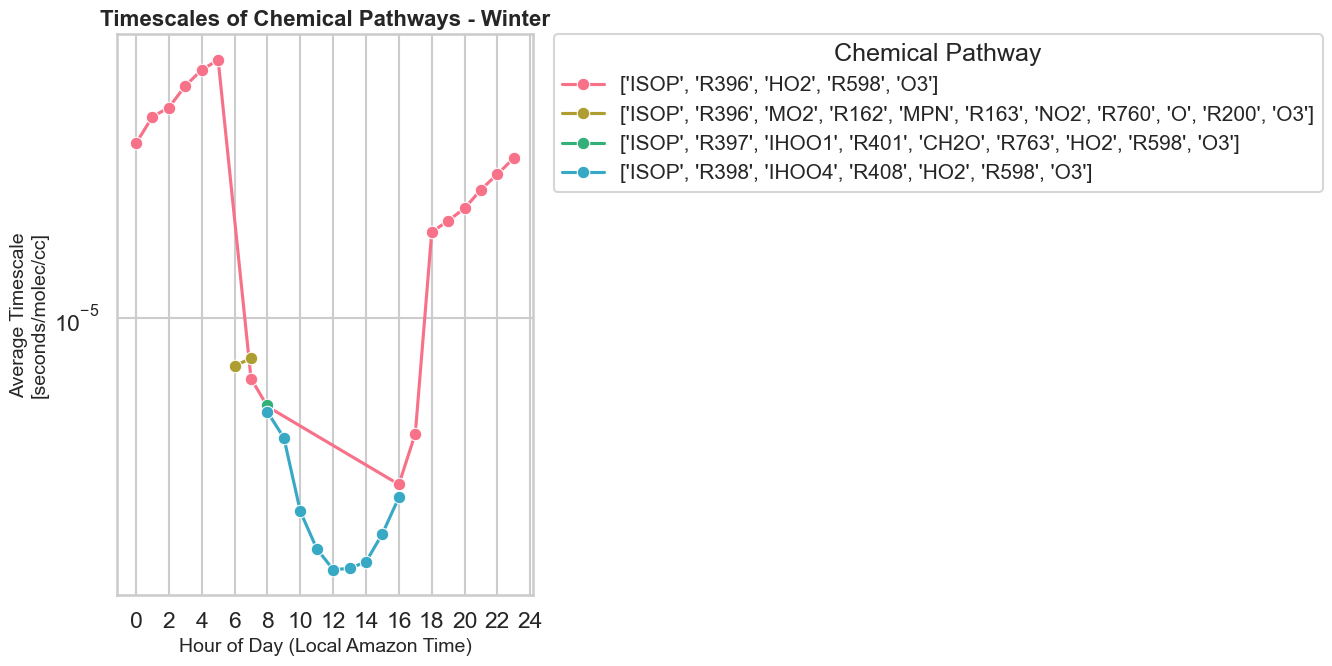

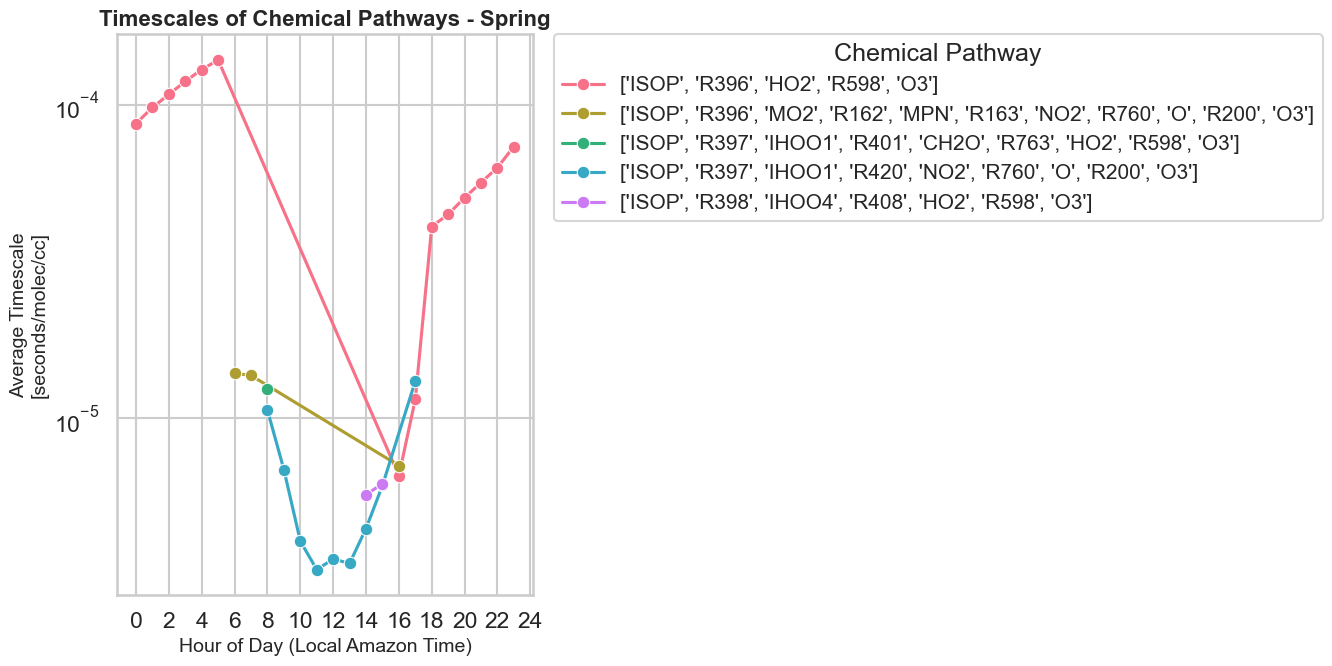

/var/folders/ss/_8gl3z6131gf35t5840414tc0000gn/T/ipykernel_98039/2227204867.py:71: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(


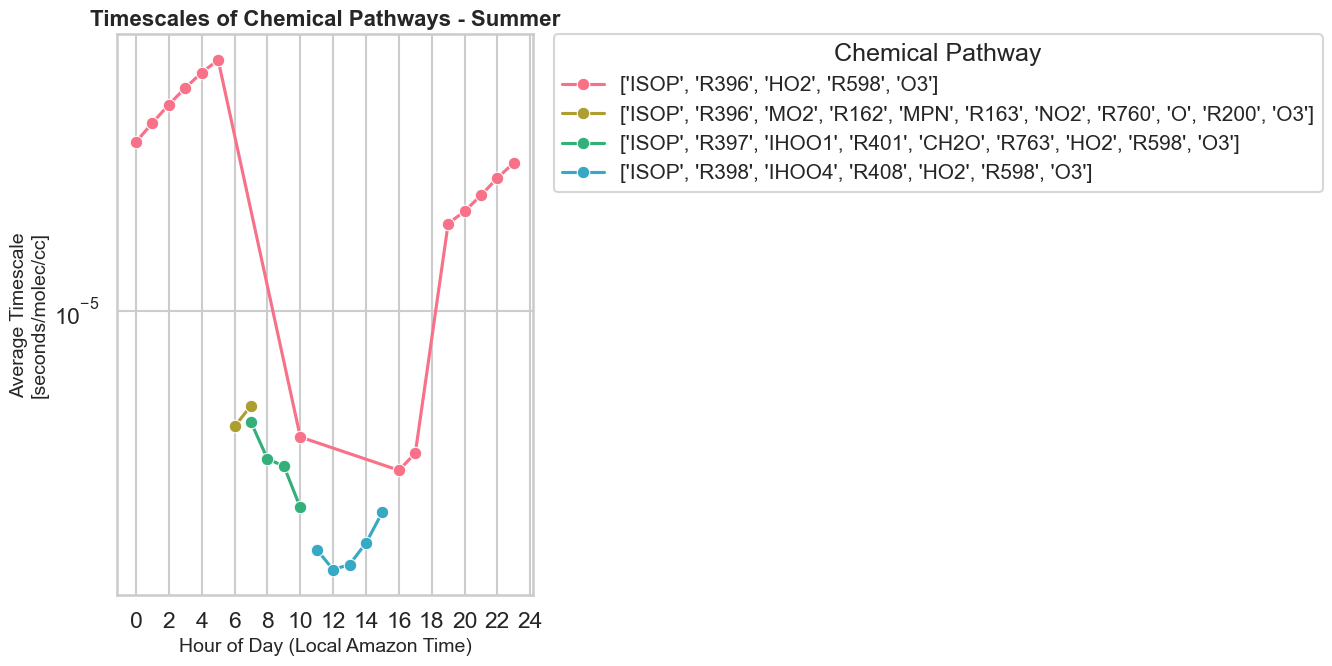

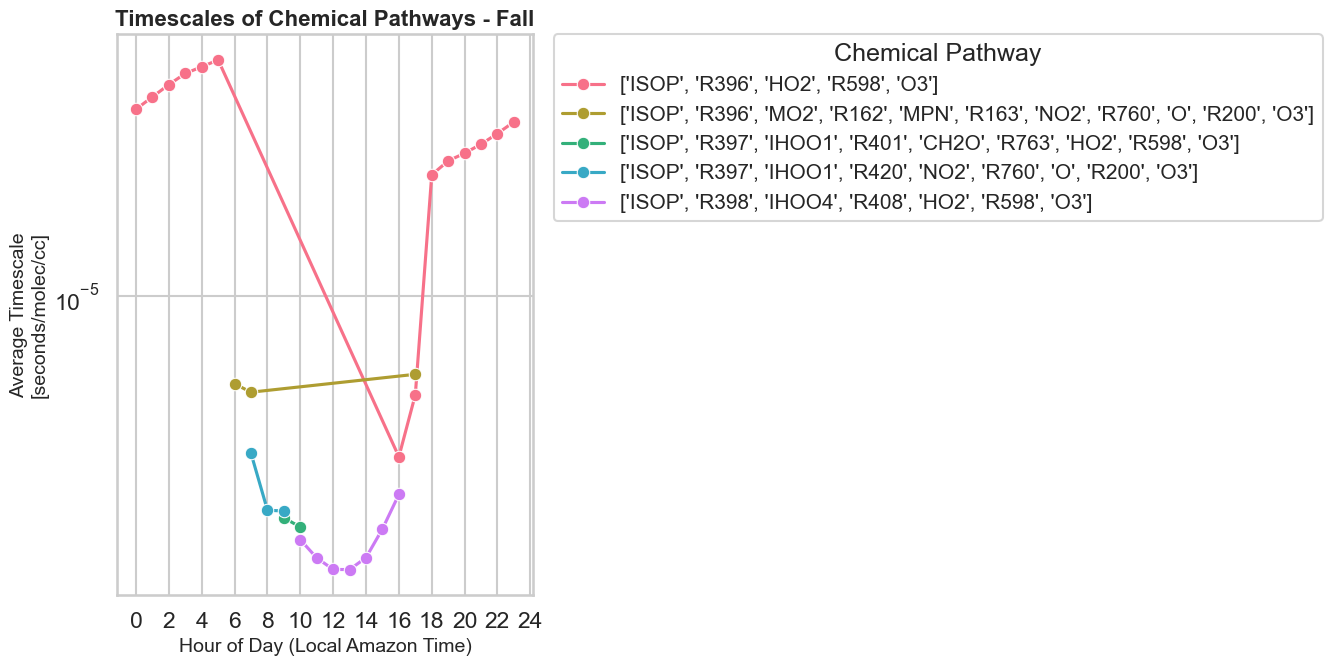

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz
from matplotlib.cm import get_cmap
import matplotlib.ticker as ticker

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract local hour and minute
amazon_data['hour'] = amazon_data['datetime_local'].dt.hour
amazon_data['minute'] = amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Create presence matrix for shortest paths
shortest_paths = amazon_data.pivot_table(index='chemical_pathway', columns='season', values='timescale', aggfunc=lambda x: 1 if x.any() else 0).fillna(0)

# Group data by hour for averaging timescale
amazon_data['hour'] = amazon_data['datetime_local'].dt.hour

# Plot one time series per season with all present reactions, averaged by hour
sns.set(style='whitegrid')
sns.set_context("talk")

# Get all present reactions in any season
# Get all present reactions in any season
present_reactions = shortest_paths[shortest_paths.sum(axis=1) > 0].index

# Define consistent color palette
palette = sns.color_palette("husl", n_colors=len(present_reactions))

for season in seasons:
    season_data = amazon_data[
        (amazon_data['season'] == season) & 
        (amazon_data['chemical_pathway'].isin(present_reactions))
    ]
    
    # Average timescales by hour for each chemical pathway
    hourly_avg = season_data.groupby(['chemical_pathway', 'hour'])['timescale'].mean().reset_index()

    plt.figure(figsize=(14, 7))
    sns.lineplot(
        data=hourly_avg,
        x='hour',
        y='timescale',
        hue='chemical_pathway',
        palette=palette,
        marker='o'
    )

    plt.yscale('log')
    plt.xticks(range(0, 24, 1))  # Tick every 2 hours
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
    plt.xlabel('Hour of Day (Local Amazon Time)', fontsize=14)
    plt.ylabel('Average Timescale\n[seconds/molec/cc]', fontsize=14)
    plt.title(f'Timescales of Chemical Pathways - {season}', fontsize=16, weight='bold')
    plt.legend(
        title="Chemical Pathway",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.,
        fontsize='small',
        title_fontsize='medium'
    )
    plt.tight_layout()
    plt.savefig(f'Timescales_{season}.png', dpi=300)
    plt.show()



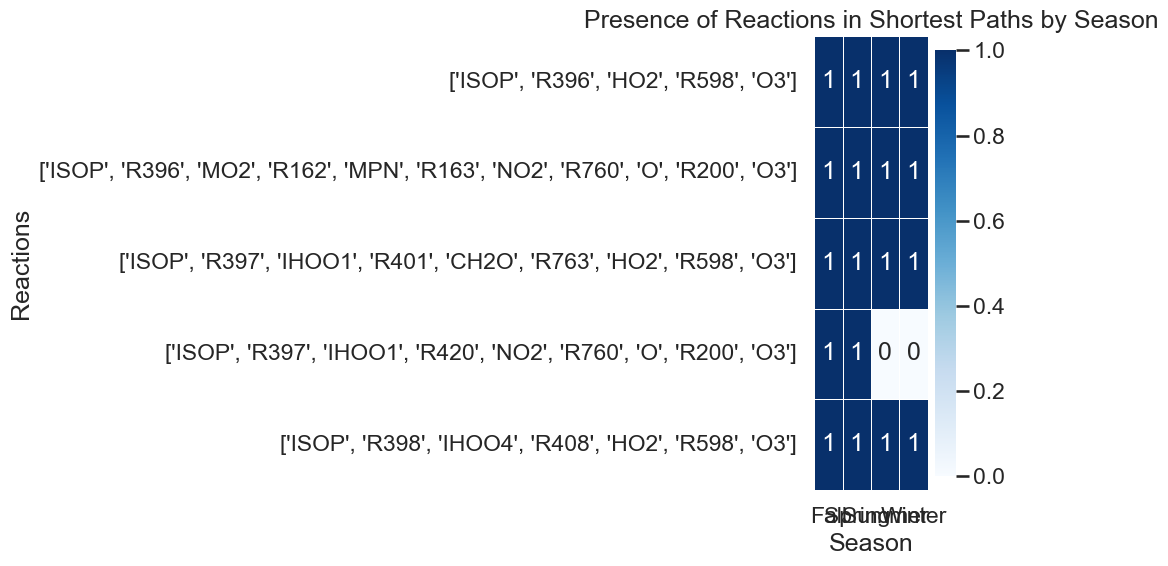

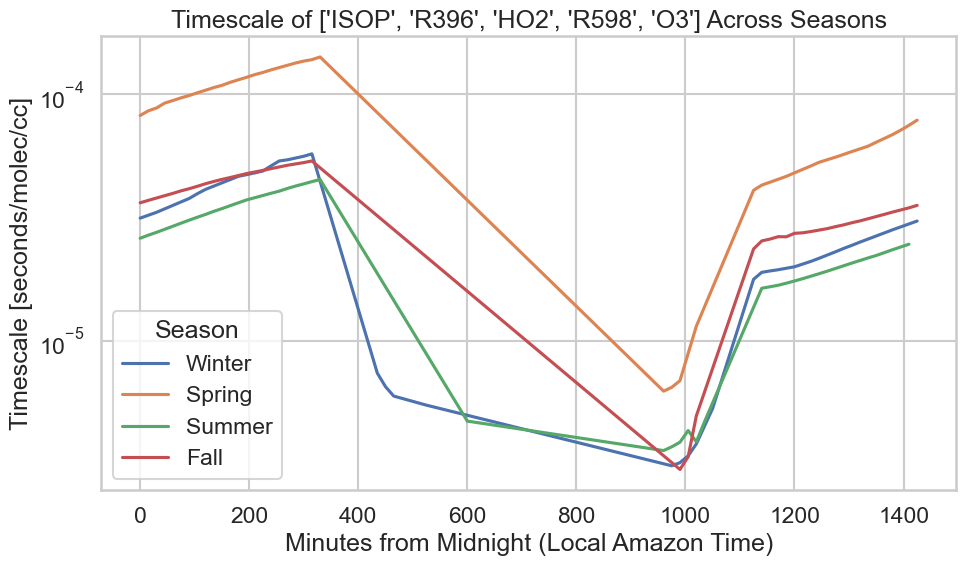

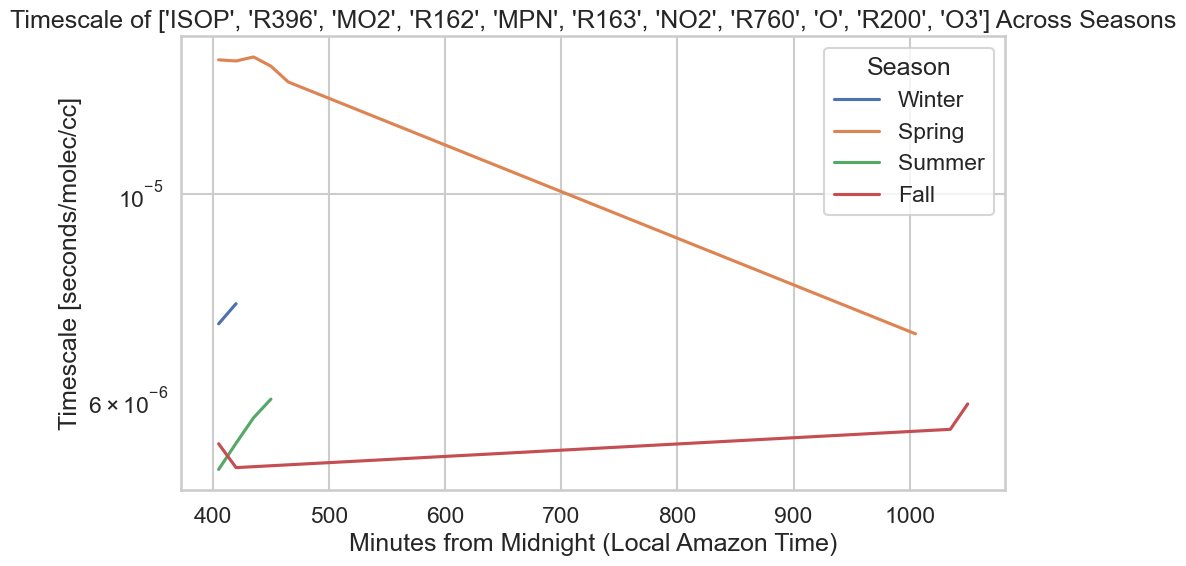

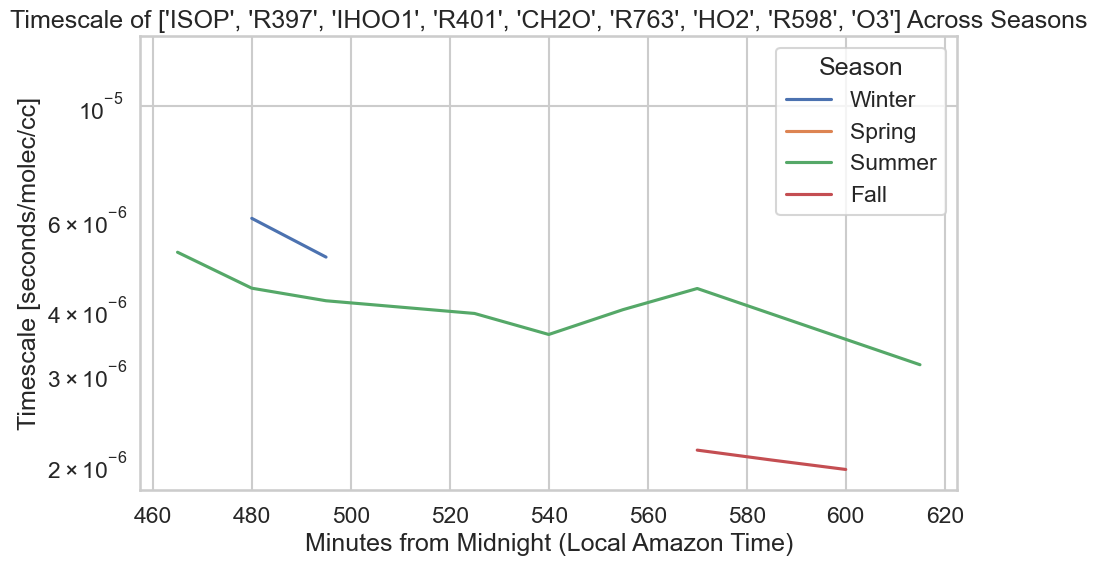

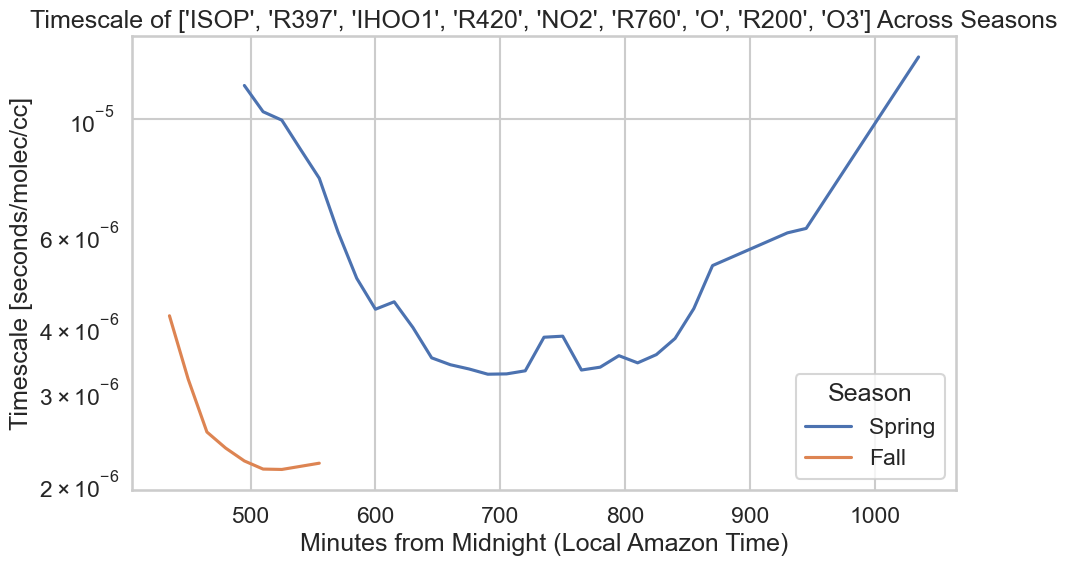

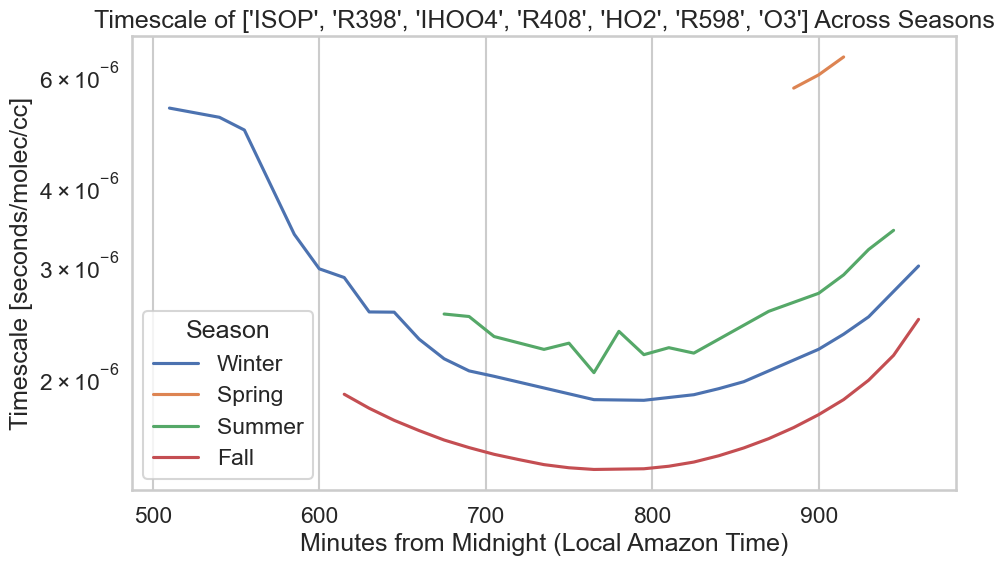

Amazon timezone conversion, heatmap, and per-pathway seasonal time series plots completed.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Create presence matrix for shortest paths
shortest_paths = amazon_data.pivot_table(index='chemical_pathway', columns='season', values='timescale', aggfunc=lambda x: 1 if x.any() else 0).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(shortest_paths, annot=True, cmap="Blues", linewidths=0.5, cbar=True)
plt.xlabel("Season")
plt.ylabel("Reactions")
plt.title("Presence of Reactions in Shortest Paths by Season")
plt.tight_layout()
plt.savefig('Shortest_Paths_Heatmap.png')
plt.show()

# Plot time series per pathway for all seasons (one plot per pathway)
sns.set(style='whitegrid')
sns.set_context("talk")
present_reactions = shortest_paths[(shortest_paths == 1).any(axis=1)].index

for reaction in present_reactions:
    pathway_data = amazon_data[amazon_data['chemical_pathway'] == reaction]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pathway_data, x='time_in_minutes', y='timescale', hue='season')
    plt.yscale('log')
    plt.xlabel('Minutes from Midnight (Local Amazon Time)')
    plt.ylabel('Timescale [seconds/molec/cc]')
    plt.title(f'Timescale of {reaction} Across Seasons')
    plt.legend(title="Season")
    plt.tight_layout()
    plt.savefig(f'Timescale_Pathway_{reaction}.png')
    plt.show()

print(f"Amazon timezone conversion, heatmap, and per-pathway seasonal time series plots completed.")


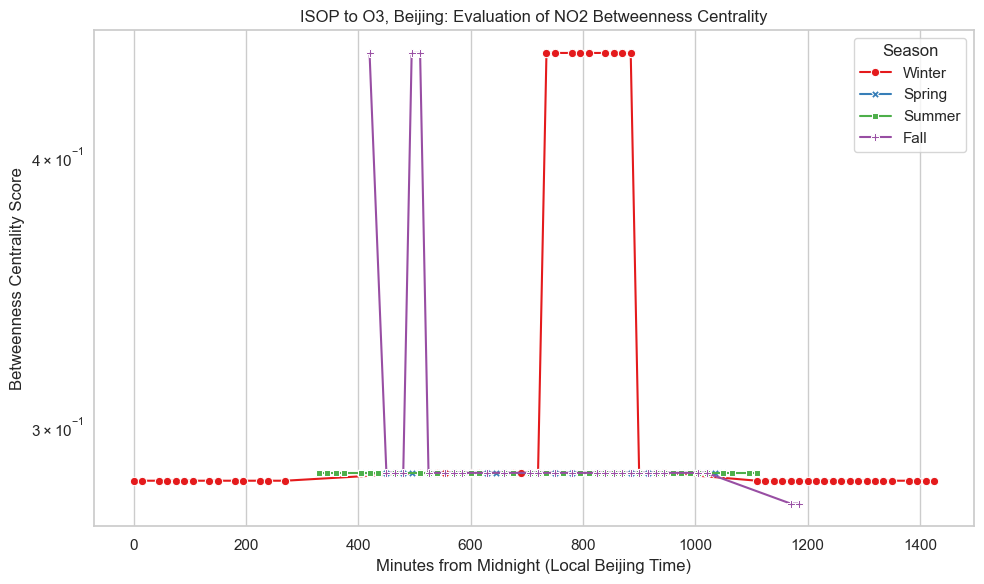

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Beijing CSV file
beijing_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BCTEST.csv'   # Update with actual file path
beijing_data = pd.read_csv(beijing_file_path)

# Extract time and date from the filename
beijing_data['time'] = beijing_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
beijing_data['date'] = beijing_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
beijing_data['datetime_utc'] = pd.to_datetime(beijing_data['date'] + beijing_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Beijing local time (UTC+8)
beijing_tz = pytz.timezone('Asia/Shanghai')
beijing_data['datetime_local'] = beijing_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(beijing_tz)

# Extract the local hour and minute for plotting
beijing_data['time_in_minutes'] = beijing_data['datetime_local'].dt.hour * 60 + beijing_data['datetime_local'].dt.minute

# Convert Chemical Pathway column from string to list (if necessary)
beijing_data['chemical_pathway'] = beijing_data['chemical_pathway'].apply(eval)

# Extract BC scores dynamically for NO2
def extract_bc_score(row, species):
    """Extract BC score for a given species from the Chemical Pathway list."""
    try:
        species_index = row['chemical_pathway'].index(species)
        return eval(row['betweenness_centrality'])[species_index]
    except (ValueError, IndexError, TypeError):
        return None  # Return None if species is not found

beijing_data['BC_NO2'] = beijing_data.apply(lambda row: extract_bc_score(row, 'NO2'), axis=1)

# Extract the month for season categorization
beijing_data['month'] = beijing_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

beijing_data['season'] = beijing_data['month'].apply(categorize_season)

# Plot NO2 BC time series
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=beijing_data, x='time_in_minutes', y='BC_NO2', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Beijing Time)')
plt.ylabel('Betweenness Centrality Score')
plt.title('ISOP to O3, Beijing: Evaluation of NO2 Betweenness Centrality')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig("ISOPO3_Beijing_HO2BC.png")
plt.show()

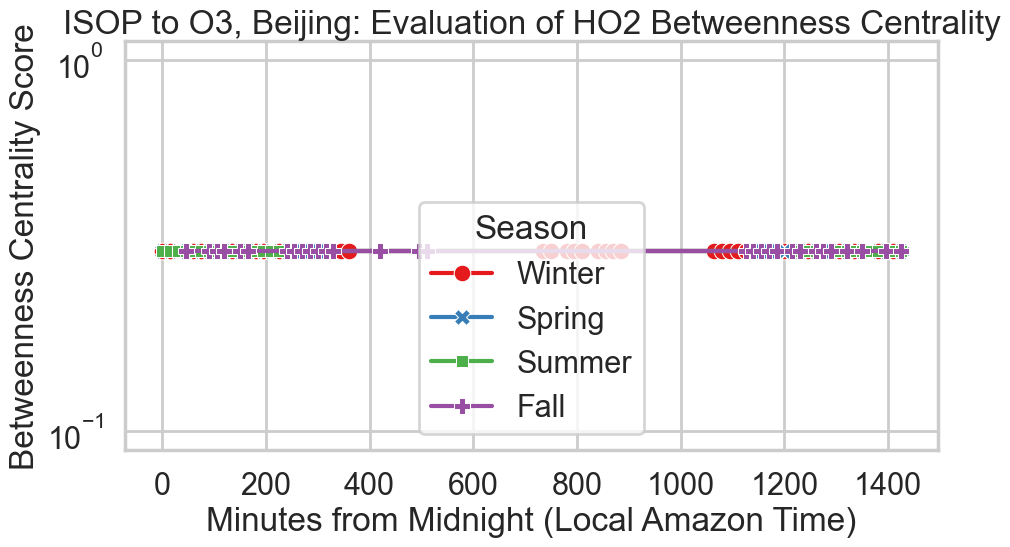

In [10]:
ho2_bc_df['time'] = ho2_bc_df['filename'].str.extract(r'_(\d{4})\.txt')[0]
ho2_bc_df['date'] = ho2_bc_df['filename'].str.extract(r'_(\d{8})')[0]

ho2_bc_df['datetime_utc'] = pd.to_datetime(ho2_bc_df['date'] + ho2_bc_df['time'], format='%Y%m%d%H%M')

tz = pytz.timezone('Asia/Shanghai')
ho2_bc_df['datetime_local'] = ho2_bc_df['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(tz)

ho2_bc_df['time_in_minutes'] = ho2_bc_df['datetime_local'].dt.hour * 60 + ho2_bc_df['datetime_local'].dt.minute

# Extract the month for season categorization
ho2_bc_df['month'] = ho2_bc_df['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

ho2_bc_df['season'] = ho2_bc_df['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=ho2_bc_df, x='time_in_minutes', y='BC_HO2', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Amazon Time)')
plt.ylabel('Betweenness Centrality Score')
plt.title('ISOP to O3, Beijing: Evaluation of HO2 Betweenness Centrality')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig("ISOPO3_Beijing_HO2BC.png")
plt.show()
            


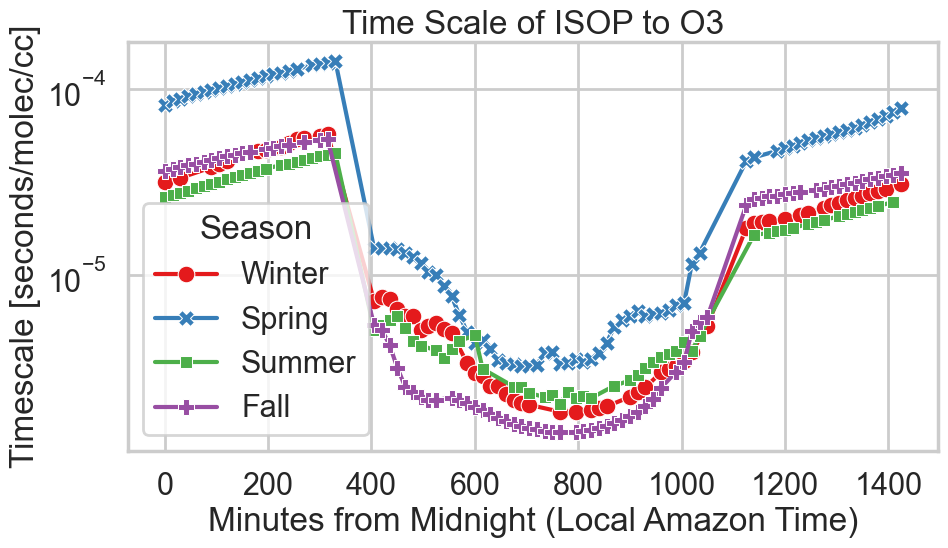

Amazon timezone conversion and plot completed.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=amazon_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Amazon Time)')
plt.ylabel('Timescale [seconds/molec/cc]')
plt.title('Time Scale of ISOP to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Amazon2018ISOP.png')
plt.show()


print(f"Amazon timezone conversion and plot completed.")


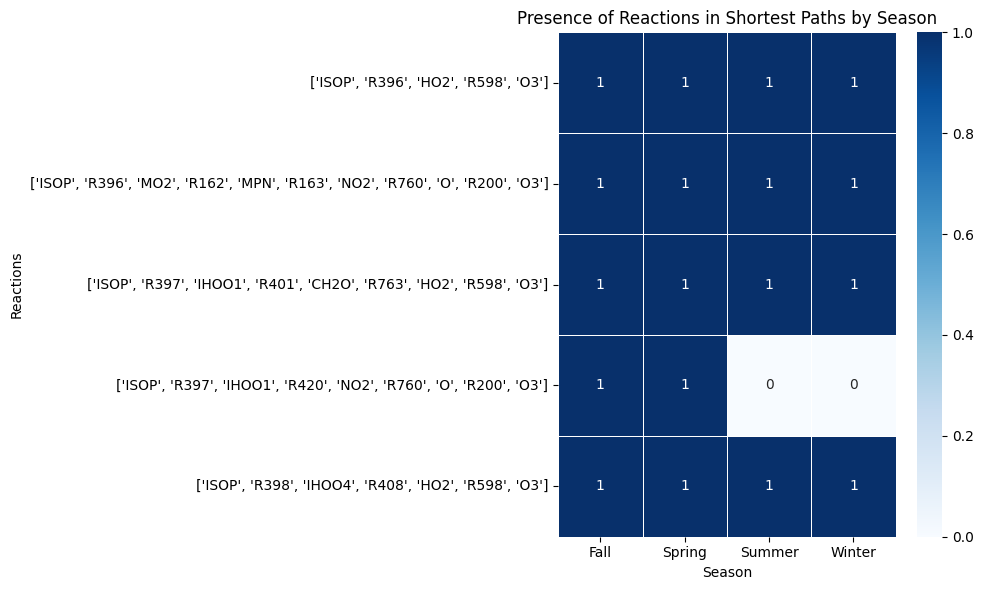

Amazon timezone conversion and heatmap plot completed.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Create presence matrix for shortest paths, a one represents the presence of species x in cell y, and a zero indicates absence
shortest_paths = amazon_data.pivot_table(index='chemical_pathway', columns='season', values='timescale', aggfunc=lambda x: 1 if x.any() else 0).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(shortest_paths, annot=True, cmap="Blues", linewidths=0.5, cbar=True)
plt.xlabel("Season")
plt.ylabel("Reactions")
plt.title("Presence of Reactions in Shortest Paths by Season")
plt.tight_layout()
plt.savefig('Shortest_Paths_Heatmap.png')
plt.show()

print(f"Amazon timezone conversion and heatmap plot completed.")


In [7]:
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BC.csv'
df = pd.read_csv(directory)
species_centrality = df["chemical_pathway"].str.strip("[]").str.replace("'", "").str.split(', ').explode()
frequency = collections.Counter(species_centrality)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=list(frequency.keys()), y=list(frequency.values()), color='skyblue', edgecolor='black')
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.title("Histogram of Betweenness Centrality Occurences for Species")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KeyError: "Missing required columns: 'Chemical Pathway' or 'Betweenness Centrality'"

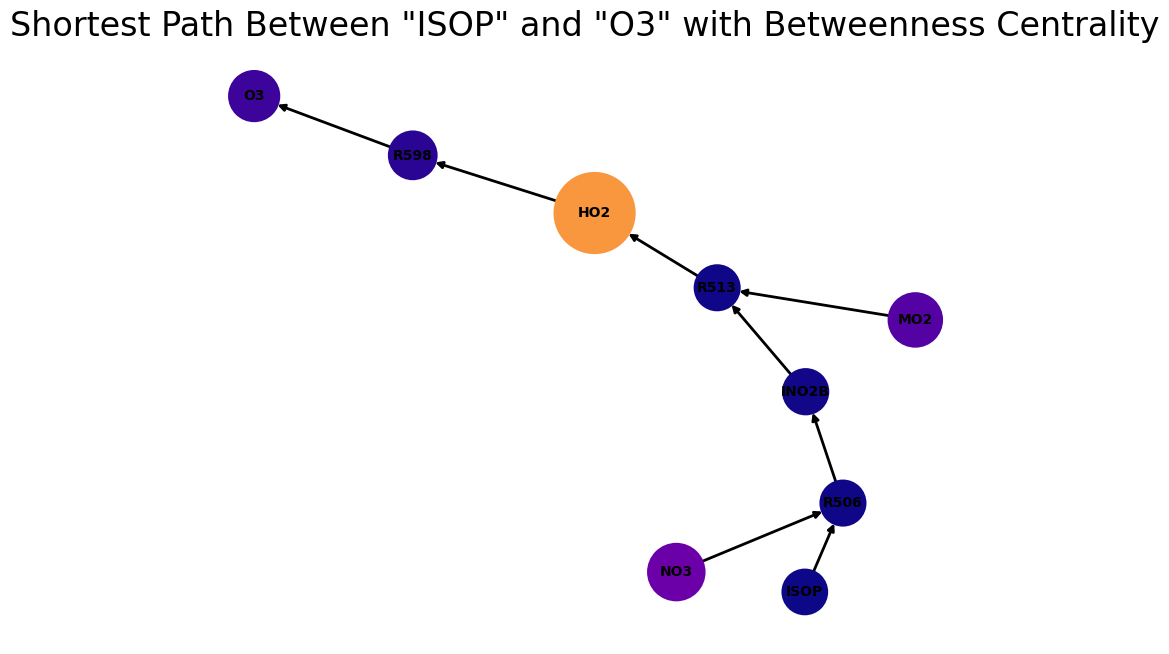

In [11]:
# Calculate the shortest path
shortest_path_smth = nx.all_shortest_paths(B, source='ISOP', target='O3', weight='timescale')

# create a directed graph for the shortest path
shortest_path_graph = nx.DiGraph()
shortest_path_edges = [
    (shortest_path_smth[i], shortest_path_smth[i + 1]) 
    for i in range(len(shortest_path_smth) - 1)
]
shortest_path_graph.add_edges_from(shortest_path_edges)

# Find the edges of index 1 and index 3 of list
r1_edges = B.in_edges(shortest_path_smth[1])
r2_edges = B.in_edges(shortest_path_smth[3])

shortest_path_graph.add_edges_from(r1_edges)
shortest_path_graph.add_edges_from(r2_edges)

# compute betweenness centrality for B
betweenness = nx.betweenness_centrality(B)

# Normalize betweenness values for visualization
max_bc = max(betweenness.values()) if max(betweenness.values()) > 0 else 1
node_sizes = [1000 + (betweenness[node] / max_bc) * 3000 if node in betweenness else 1000 for node in shortest_path_graph.nodes]

# Set node colors based on betweenness centrality score
node_color = [plt.cm.plasma(betweenness[node] / max_bc) if node in betweenness else 'grey' for node in shortest_path_graph.nodes]

sns.set_context("poster")
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(shortest_path_graph, seed=1) 

nx.draw(
    shortest_path_graph, pos, 
    with_labels=True, 
    node_size=node_sizes, 
    node_color=node_color,
    edge_color='black',
    font_size=10, 
    font_weight='bold', 
    width=2, 
    arrows=True, 
    arrowsize=10
)

plt.title('Shortest Path Between "ISOP" and "O3" with Betweenness Centrality')
plt.savefig('DirectedShortestPath_Betweenness.png', dpi=300)
plt.show()

In [ ]:
### import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/'
master_df = pd.DataFrame()  # Empty DataFrame to store all data

for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.csv'):
            filepath = os.path.join(root, filename)
            data = pd.read_csv(filepath)

            if 'timescale' in data.columns:
                master_df = pd.concat([master_df, data[['timescale']].dropna()], ignore_index=True)

# Kernel Density Estimation
sns.set_context("poster")
plt.figure()
plt.xscale('log')
sns.kdeplot(master_df['timescale'], bw_adjust=1)
plt.title('All Emitted Species')
plt.xlabel('Time Scale [seconds/molec/cc]')
plt.ylabel('Density')
plt.savefig('BulkKDE.png')
plt.show()



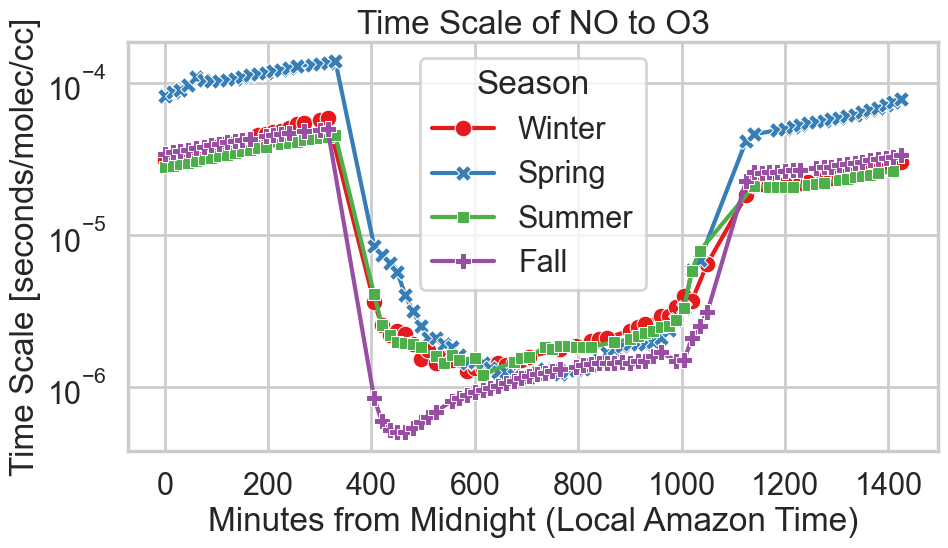

Amazon timezone conversion and plot completed.


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018NO.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=amazon_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Amazon Time)')
plt.ylabel('Time Scale [seconds/molec/cc]')
plt.title('Time Scale of NO to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Amazon2018NO.png')
plt.show()


print(f"Amazon timezone conversion and plot completed.")


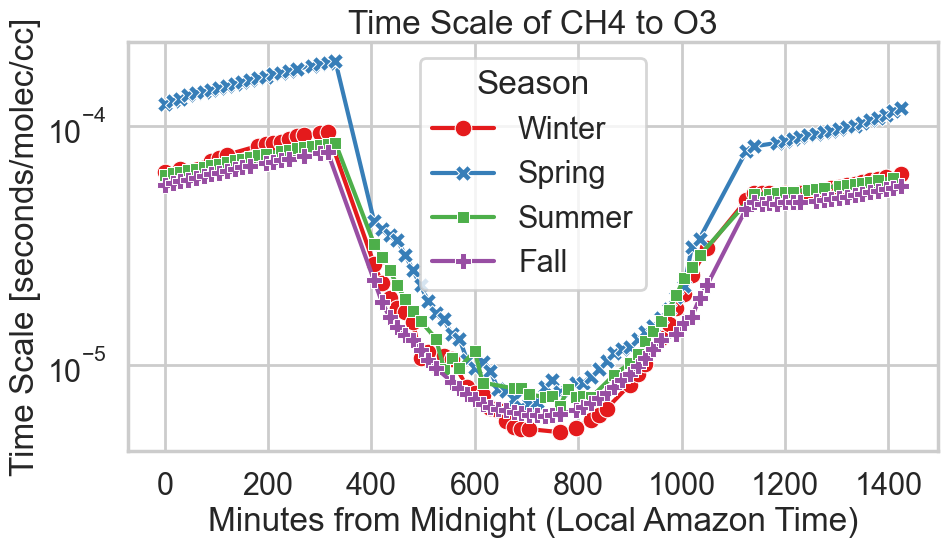

Amazon timezone conversion and plot completed.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018CH4.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=amazon_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Amazon Time)')
plt.ylabel('Time Scale [seconds/molec/cc]')
plt.title('Time Scale of CH4 to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Amazon2018CH4.png')
plt.show()


print(f"Amazon timezone conversion and plot completed.")


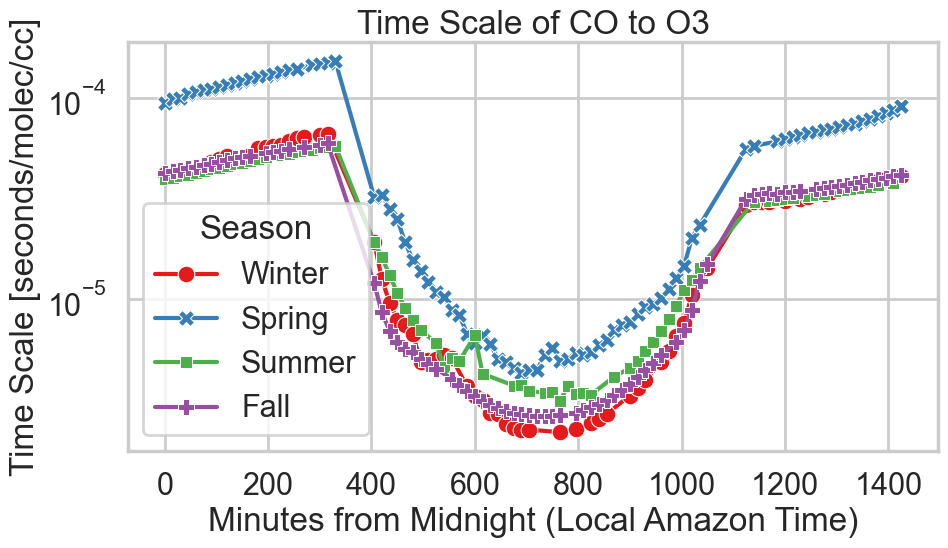

Amazon timezone conversion and plot completed.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018CO.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=amazon_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Amazon Time)')
plt.ylabel('Time Scale [seconds/molec/cc]')
plt.title('Time Scale of CO to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Amazon2018CO.png')
plt.show()


print(f"Amazon timezone conversion and plot completed.")


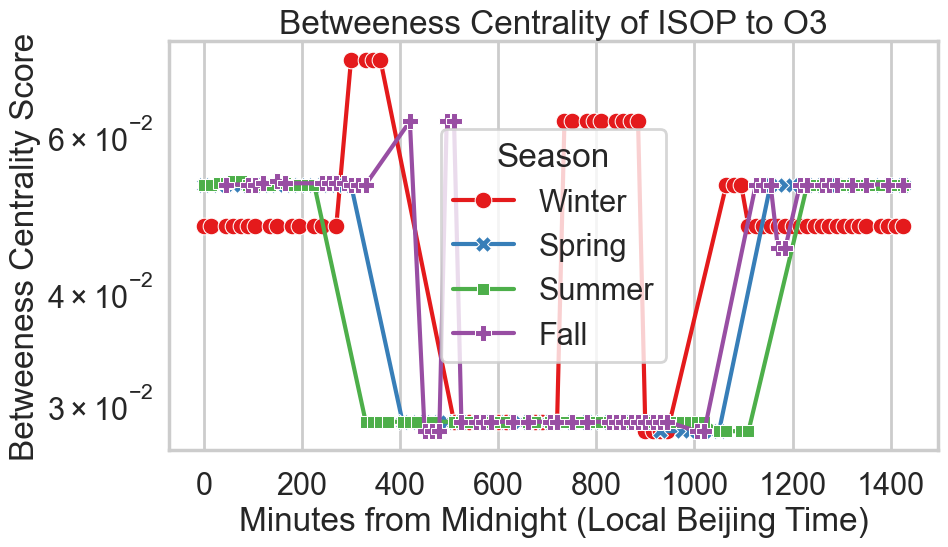

In [37]:
beijing_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP_BC.csv'
beijing_data = pd.read_csv(beijing_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
beijing_data['time'] = beijing_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
beijing_data['date'] = beijing_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
beijing_data['datetime_utc'] = pd.to_datetime(beijing_data['date'] + beijing_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Beijing local time (UTC+8)
beijing_tz = pytz.timezone('Asia/Shanghai')
beijing_data['datetime_local'] = beijing_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(beijing_tz)

# Extract the local hour and minute for plotting
beijing_data['time_in_minutes'] = beijing_data['datetime_local'].dt.hour * 60 + beijing_data['datetime_local'].dt.minute

# Extract the month for season categorization
beijing_data['month'] = beijing_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

beijing_data['season'] = beijing_data['month'].apply(categorize_season)

# Plot KDE for Beijing data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=beijing_data, x='time_in_minutes', y='betweenness_centrality', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Beijing Time)')
plt.ylabel('Betweeness Centrality Score')
plt.title('Betweeness Centrality of ISOP to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Beijing2018ISOP.png')
plt.show()

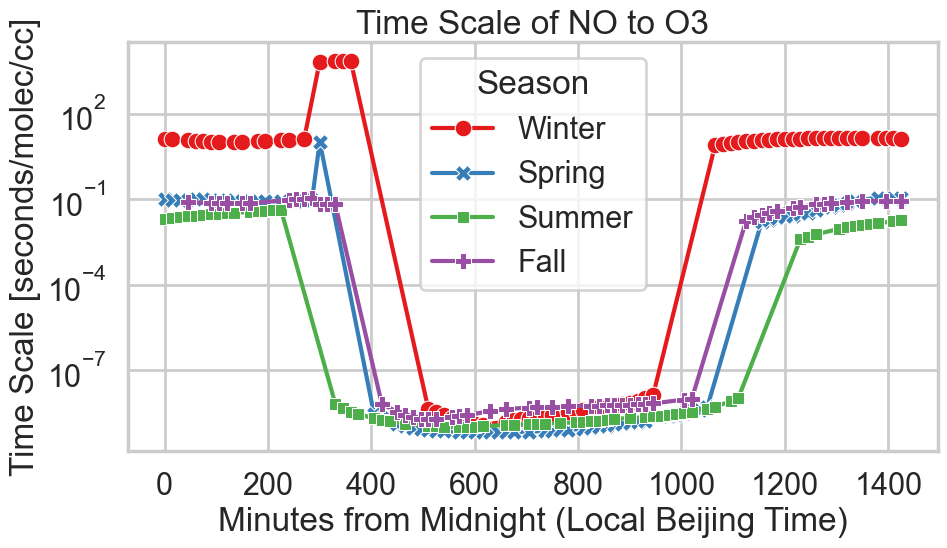

In [21]:
beijing_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018NO.csv'
beijing_data = pd.read_csv(beijing_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
beijing_data['time'] = beijing_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
beijing_data['date'] = beijing_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
beijing_data['datetime_utc'] = pd.to_datetime(beijing_data['date'] + beijing_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Beijing local time (UTC+8)
beijing_tz = pytz.timezone('Asia/Shanghai')
beijing_data['datetime_local'] = beijing_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(beijing_tz)

# Extract the local hour and minute for plotting
beijing_data['time_in_minutes'] = beijing_data['datetime_local'].dt.hour * 60 + beijing_data['datetime_local'].dt.minute

# Extract the month for season categorization
beijing_data['month'] = beijing_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

beijing_data['season'] = beijing_data['month'].apply(categorize_season)

# Plot KDE for Beijing data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=beijing_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Beijing Time)')
plt.ylabel('Time Scale [seconds/molec/cc]')
plt.title('Time Scale of NO to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Beijing2018NO.png')
plt.show()

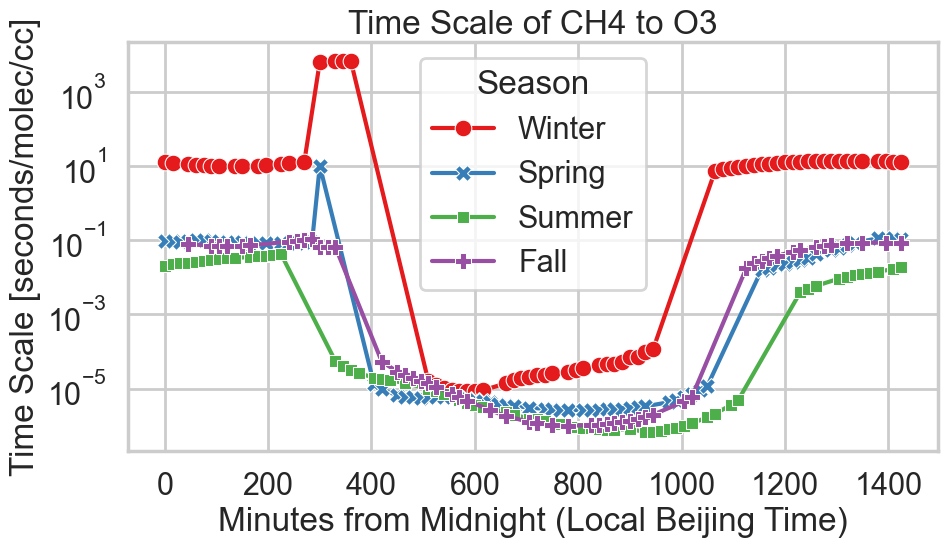

Amazon timezone conversion and plot completed.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018CH4.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('Asia/Shanghai')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=amazon_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Beijing Time)')
plt.ylabel('Time Scale [seconds/molec/cc]')
plt.title('Time Scale of CH4 to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Beijing2018CH4.png')
plt.show()

print(f"Amazon timezone conversion and plot completed.")


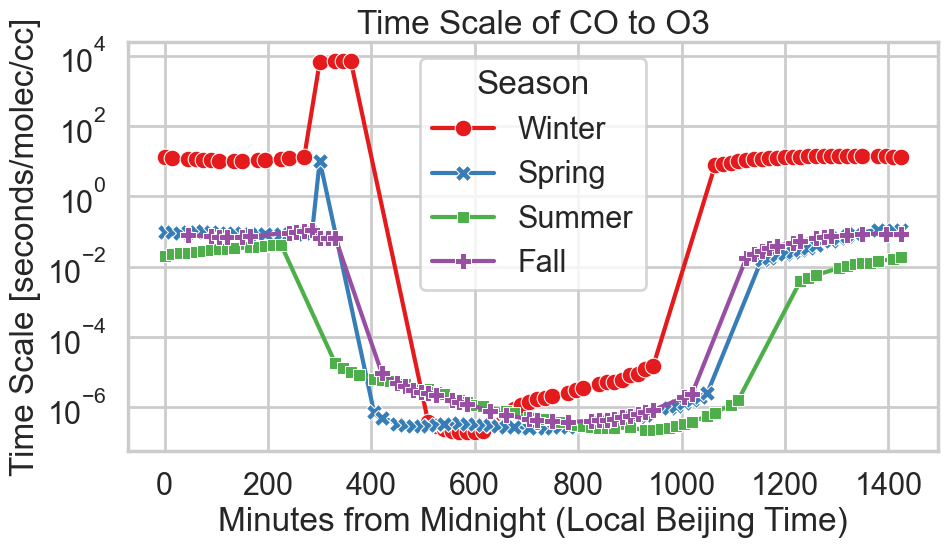

Amazon timezone conversion and plot completed.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load the Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018CO.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('Asia/Shanghai')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Plot KDE for Amazon data
sns.set(style='whitegrid')
sns.set_context("poster")
plt.figure(figsize=(10, 6))
sns.lineplot(data=amazon_data, x='time_in_minutes', y='timescale', hue='season', style='season', markers=True, dashes=False, palette='Set1')
plt.yscale('log')
plt.xlabel('Minutes from Midnight (Local Beijing Time)')
plt.ylabel('Time Scale [seconds/molec/cc]')
plt.title('Time Scale of CO to O3')
plt.legend(title="Season")
plt.tight_layout()
plt.savefig('Beijing2018CO.png')
plt.show()

print(f"Amazon timezone conversion and plot completed.")


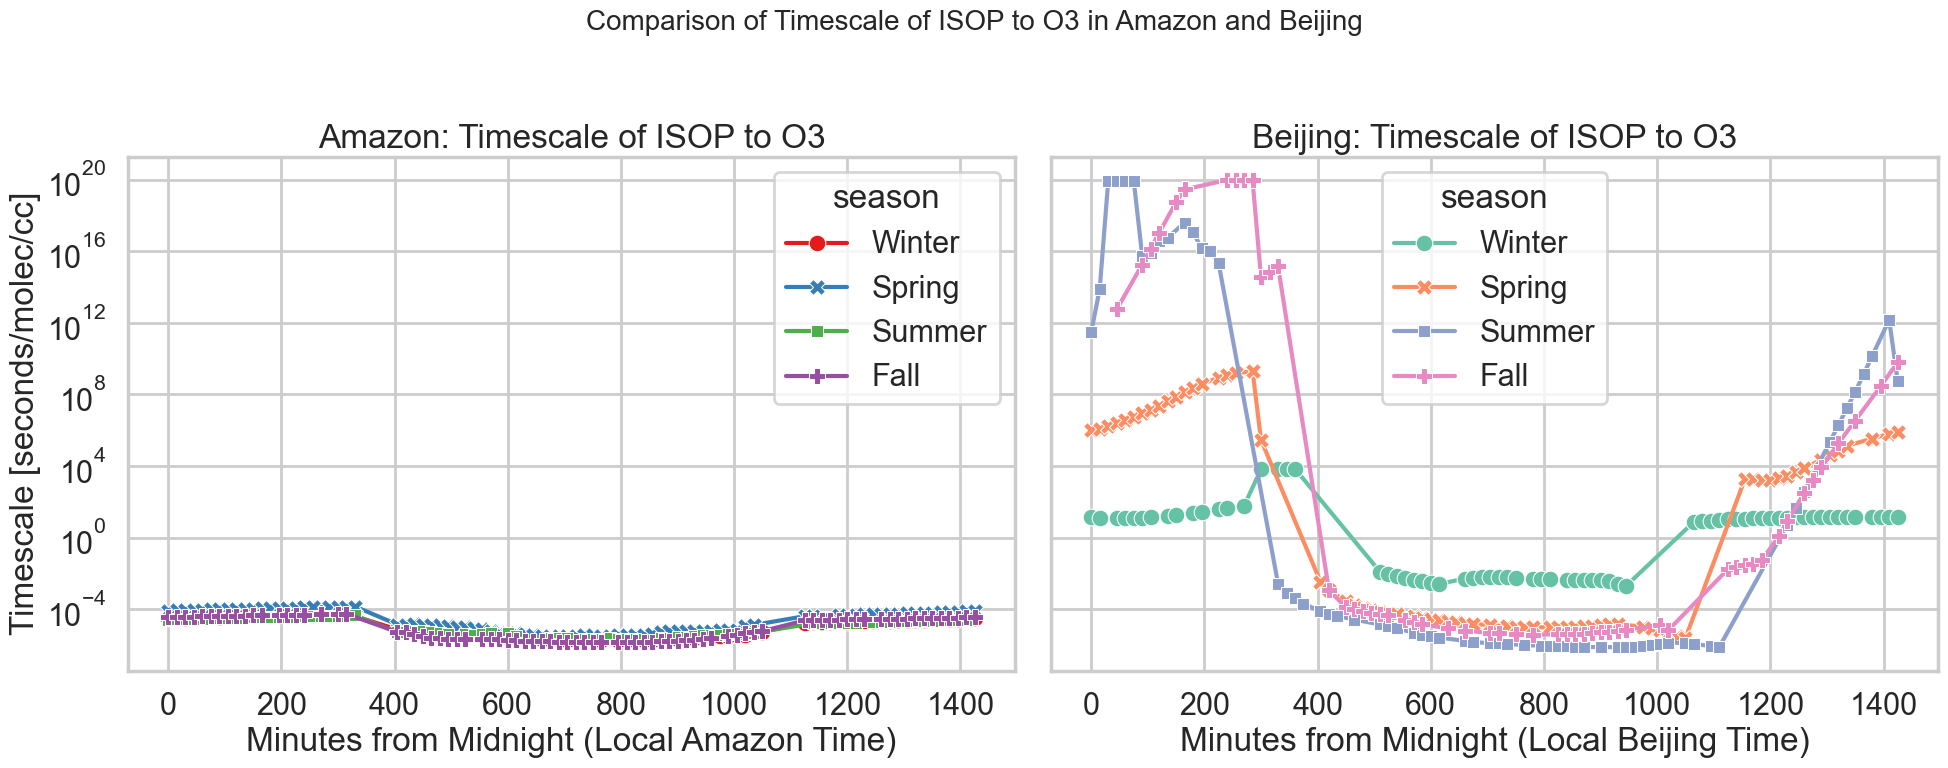

Amazon and Beijing timezone conversion and plots completed.


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

# Load Amazon CSV file
amazon_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Amazon2018ISOP.csv'
amazon_data = pd.read_csv(amazon_file_path)

# Extract time of day (HHMM) and date (YYYYMMDD) from the filename
amazon_data['time'] = amazon_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
amazon_data['date'] = amazon_data['filename'].str.extract(r'_(\d{8})')[0]

# Combine date and time into a single datetime column in UTC
amazon_data['datetime_utc'] = pd.to_datetime(amazon_data['date'] + amazon_data['time'], format='%Y%m%d%H%M')

# Convert UTC to Amazon local time (UTC-4)
amazon_tz = pytz.timezone('America/Manaus')
amazon_data['datetime_local'] = amazon_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(amazon_tz)

# Extract the local hour and minute for plotting
amazon_data['time_in_minutes'] = amazon_data['datetime_local'].dt.hour * 60 + amazon_data['datetime_local'].dt.minute

# Extract the month for season categorization
amazon_data['month'] = amazon_data['date'].str[4:6]

# Function to categorize into seasons
def categorize_season(month):
    month = int(month)
    if month in [1]:  
        return 'Winter'
    elif month in [4]:  
        return 'Spring'
    elif month in [7]:  
        return 'Summer'
    else:  
        return 'Fall'

amazon_data['season'] = amazon_data['month'].apply(categorize_season)

# Repeat similar steps for Beijing data
beijing_file_path = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry Earth Data Science Work/Amazon + Beijing Emitted Species Data/Beijing2018ISOP.csv'
beijing_data = pd.read_csv(beijing_file_path)

beijing_data['time'] = beijing_data['filename'].str.extract(r'_(\d{4})\.txt')[0]
beijing_data['date'] = beijing_data['filename'].str.extract(r'_(\d{8})')[0]

beijing_data['datetime_utc'] = pd.to_datetime(beijing_data['date'] + beijing_data['time'], format='%Y%m%d%H%M')

beijing_tz = pytz.timezone('Asia/Shanghai')
beijing_data['datetime_local'] = beijing_data['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert(beijing_tz)

beijing_data['time_in_minutes'] = beijing_data['datetime_local'].dt.hour * 60 + beijing_data['datetime_local'].dt.minute

beijing_data['month'] = beijing_data['date'].str[4:6]
beijing_data['season'] = beijing_data['month'].apply(categorize_season)

# Create subplots
sns.set(style='whitegrid')
sns.set_context("poster")
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Amazon subplot
sns.lineplot(
    data=amazon_data, 
    x='time_in_minutes', 
    y='timescale', 
    hue='season', 
    style='season', 
    markers=True, 
    dashes=False, 
    palette='Set1', 
    ax=axes[0]
)
axes[0].set_title('Amazon: Timescale of ISOP to O3')
axes[0].set_xlabel('Minutes from Midnight (Local Amazon Time)')
axes[0].set_ylabel('Timescale [seconds/molec/cc]')
axes[0].set_yscale('log')

# Beijing subplot
sns.lineplot(
    data=beijing_data, 
    x='time_in_minutes', 
    y='timescale', 
    hue='season', 
    style='season', 
    markers=True, 
    dashes=False, 
    palette='Set2', 
    ax=axes[1]
)
axes[1].set_title('Beijing: Timescale of ISOP to O3')
axes[1].set_xlabel('Minutes from Midnight (Local Beijing Time)')
axes[1].set_yscale('log')

# Adjust layout and add common labels
fig.suptitle('Comparison of Timescale of ISOP to O3 in Amazon and Beijing', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Amazon_Beijing_Comparison.png')
plt.show()

print(f"Amazon and Beijing timezone conversion and plots completed.")

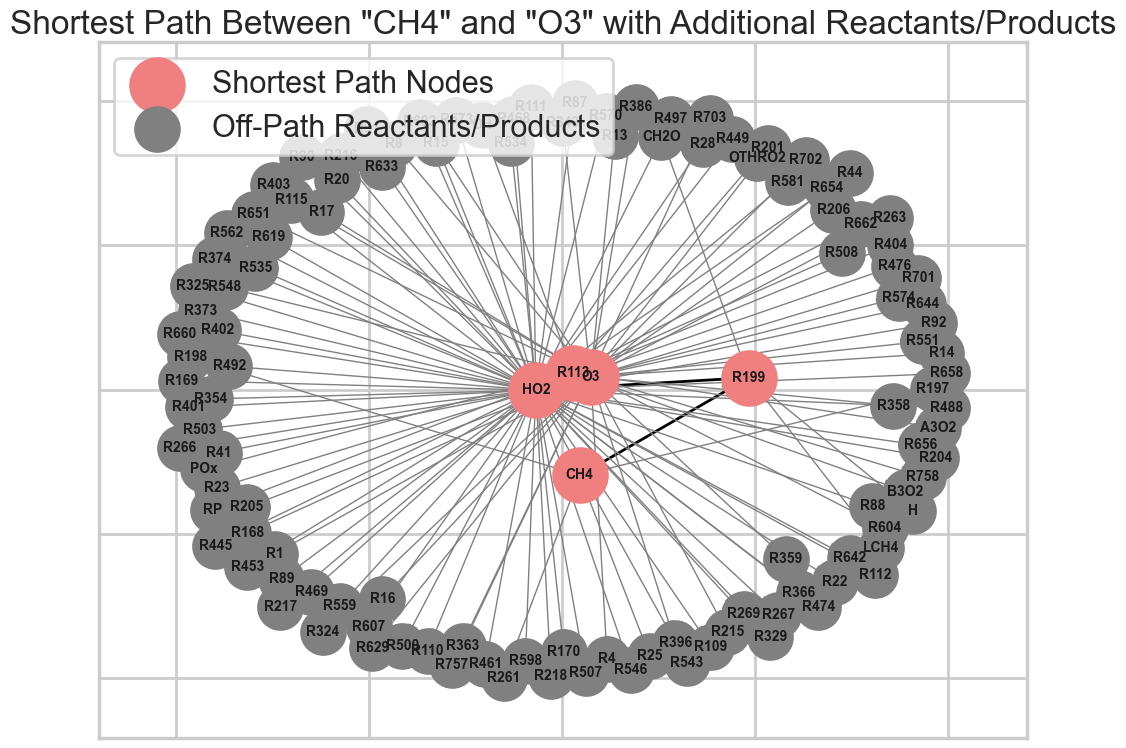

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the shortest path
shortest_path_smth_methane = nx.shortest_path(B, source='CH4', target='O3', weight='timescale')

# Create a directed graph for the shortest path
shortest_path_graph = nx.DiGraph()
shortest_path_edges = [
    (shortest_path_smth_methane[i], shortest_path_smth_methane[i + 1]) 
    for i in range(len(shortest_path_smth_methane) - 1)
]
shortest_path_graph.add_edges_from(shortest_path_edges)

# Add nodes and edges for species connected to reaction nodes but not in the shortest path
off_path_nodes = set()
nodes_to_iterate = list(shortest_path_graph.nodes)  # Make a copy of nodes to iterate
for node in nodes_to_iterate:
    for neighbor in B.neighbors(node):
        if neighbor not in shortest_path_smth_methane:
            shortest_path_graph.add_node(neighbor)
            shortest_path_graph.add_edge(node, neighbor)
            off_path_nodes.add(neighbor)

# Define layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(shortest_path_graph)  # layout algorithm

# Draw nodes for the shortest path
nx.draw_networkx_nodes(
    shortest_path_graph, pos,
    nodelist=shortest_path_smth_methane,
    node_color='lightcoral', node_size=1500, label="Shortest Path Nodes"
)

# Draw reaction nodes (off-path species)
nx.draw_networkx_nodes(
    shortest_path_graph, pos,
    nodelist=list(off_path_nodes),
    node_color='gray', node_size=1000, label="Off-Path Reactants/Products"
)

# Draw edges with arrows
nx.draw_networkx_edges(
    shortest_path_graph, pos,
    edgelist=shortest_path_edges,
    edge_color='black', width=2, arrows=True, arrowsize=20
)
nx.draw_networkx_edges(
    shortest_path_graph, pos,
    edgelist=[(u, v) for u, v in shortest_path_graph.edges if (u, v) not in shortest_path_edges],
    edge_color='gray', width=1, arrows=True, arrowsize=15
)

# Draw labels
nx.draw_networkx_labels(
    shortest_path_graph, pos, font_size=10, font_weight='bold'
)

# Add title and legend
plt.title('Shortest Path Between "CH4" and "O3" with Additional Reactants/Products')
plt.legend(scatterpoints=1, loc='upper left')
plt.tight_layout()
plt.savefig('DirectedPathWithReactants.png')
plt.show()

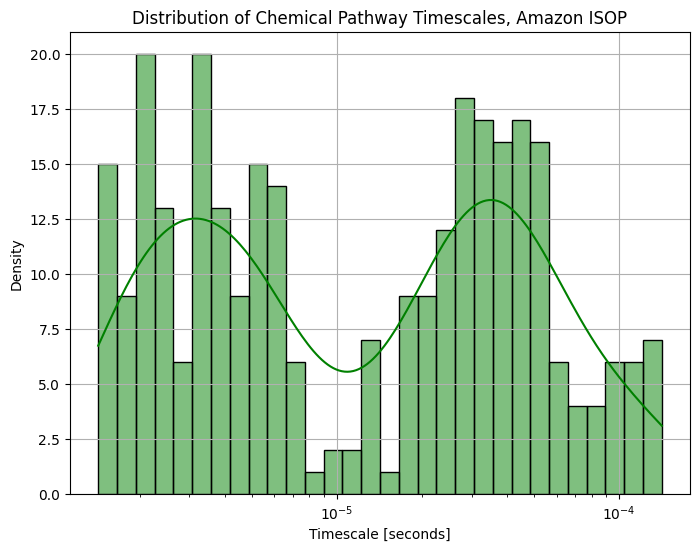

In [27]:
reaction_data = pd.read_csv("Amazon2018ISOP.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['timescale'], bins=30, log_scale=True, color='green', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Amazon ISOP")
plt.xlabel("Timescale [seconds]")
plt.ylabel("Density")
plt.grid(True)
plt.show()

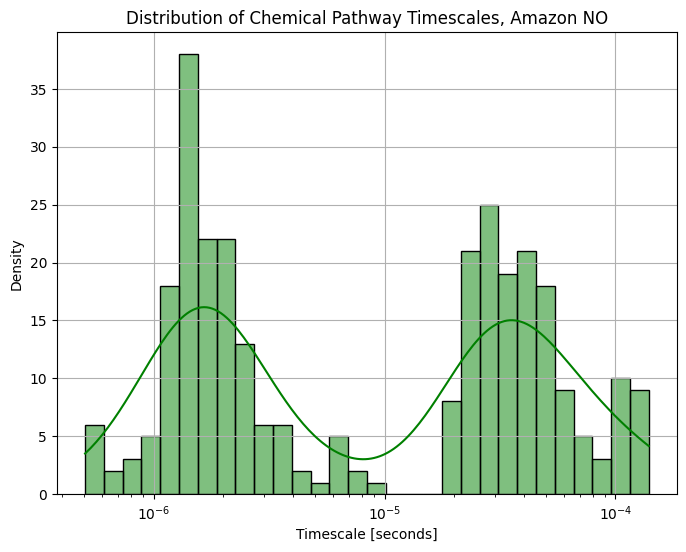

In [26]:
reaction_data = pd.read_csv("Amazon2018NO.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['timescale'], bins=30, log_scale=True, color='green', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Amazon NO")
plt.xlabel("Timescale [seconds]")
plt.ylabel("Density")
plt.grid(True)
plt.show()

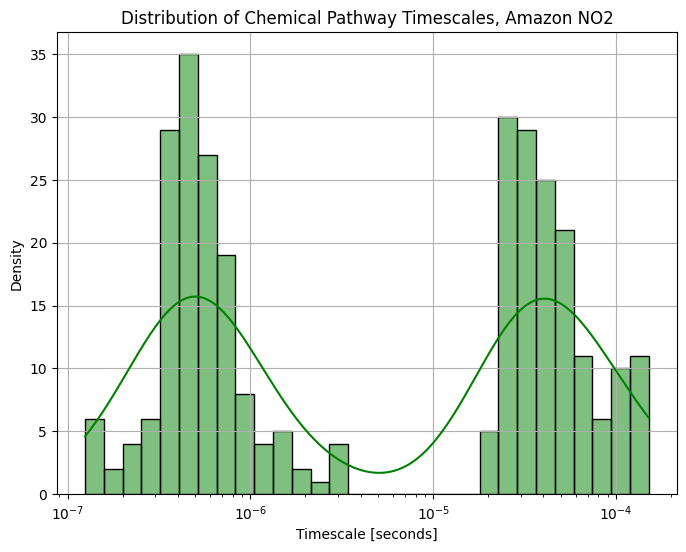

In [25]:
reaction_data = pd.read_csv("Amazon2018NO2.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['timescale'], bins=30, log_scale=True, color='green', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Amazon NO2")
plt.xlabel("Timescale [seconds]")
plt.ylabel("Density")
plt.grid(True)
plt.show()

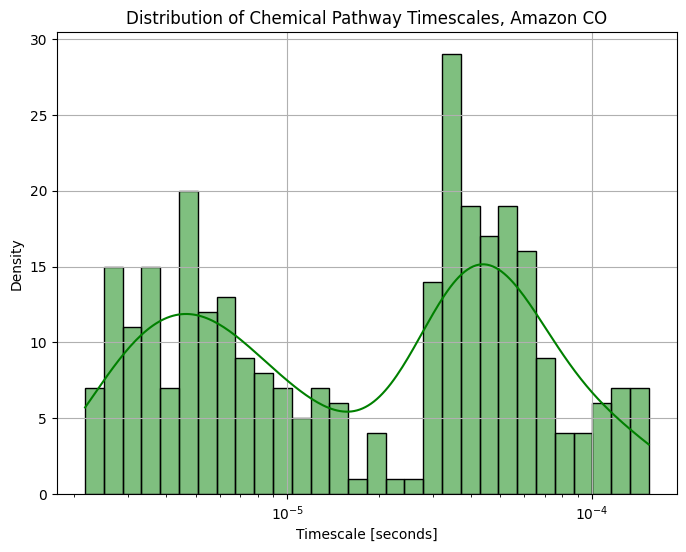

In [24]:
reaction_data = pd.read_csv("Amazon2018CO.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['timescale'], bins=30, log_scale=True, color='green', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Amazon CO")
plt.xlabel("Timescale [seconds]")
plt.ylabel("Density")
plt.grid(True)
plt.show()

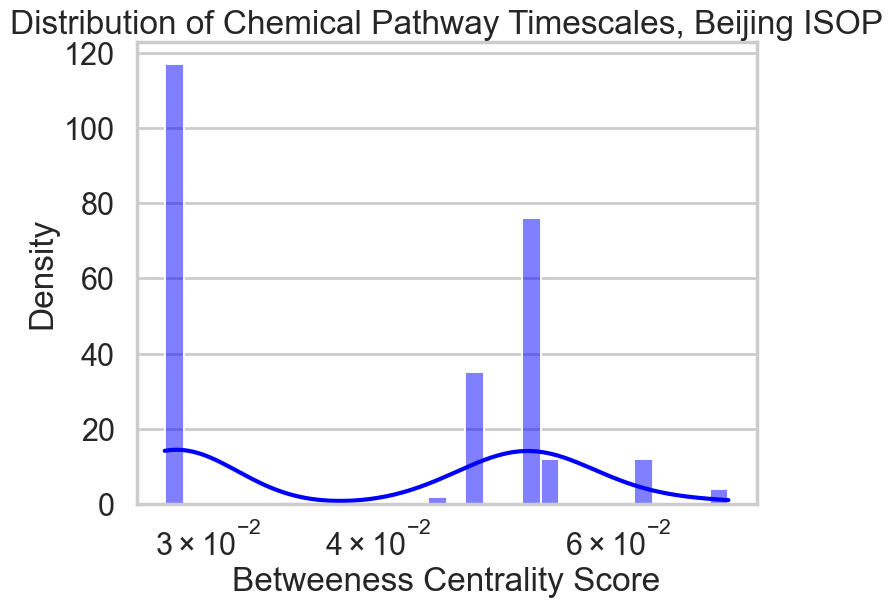

In [36]:
reaction_data = pd.read_csv("Beijing2018ISOP_BC.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['betweenness_centrality'], bins=30, log_scale=True, color='blue', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Beijing ISOP")
plt.xlabel("Betweeness Centrality Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()

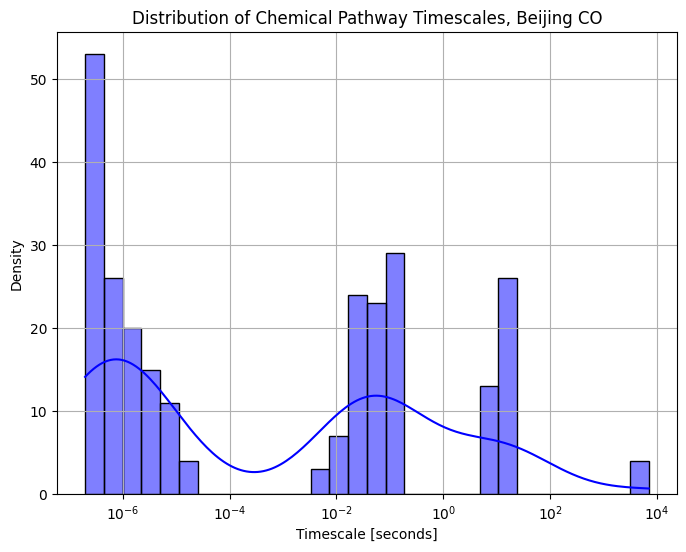

In [34]:
reaction_data = pd.read_csv("Beijing2018CO.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['timescale'], bins=30, log_scale=True, color='blue', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Beijing CO")
plt.xlabel("Timescale [seconds]")
plt.ylabel("Density")
plt.grid(True)
plt.show()

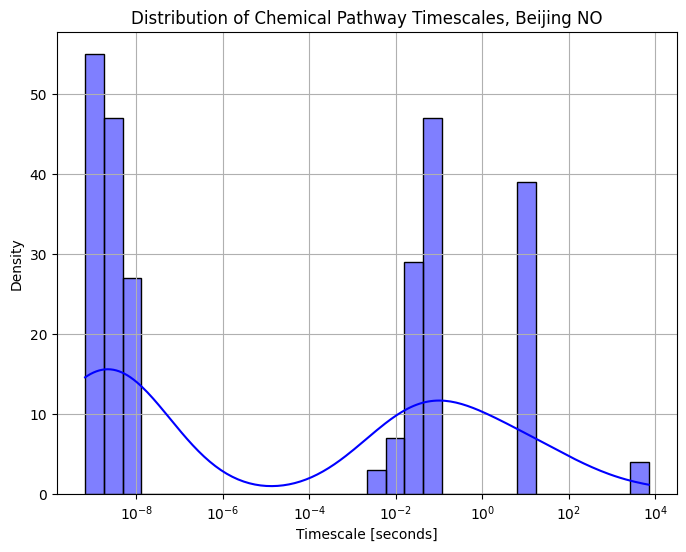

In [33]:
reaction_data = pd.read_csv("Beijing2018NO.csv")

# Plotting a histogram of the timescale values
plt.figure(figsize=(8, 6))
sns.histplot(reaction_data['timescale'], bins=30, log_scale=True, color='blue', kde=True)
plt.title("Distribution of Chemical Pathway Timescales, Beijing NO")
plt.xlabel("Timescale [seconds]")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [49]:
### OLD CODE
directory = '/Users/lucasvalliere/Desktop/Atmospheric Chemistry & Earth Data Science Work/Amazon April/'

file_list = sorted(os.listdir(directory))

for filename in file_list :
    if filename.endswith(".txt"):  
        filepath = os.path.join(directory, filename)
        
       
        amazon_surface = ChemicalCase(filepath)
        
        for i in range(1, 914):
            # For all edges coming in and out of a reaction node, set to half the rxn timescale 
            for u, v in B.in_edges("R" + str(i)):
                B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)  # 1e-20 to avoid divide by 0
            for u, v in B.out_edges("R" + str(i)):
                B[u][v]['timescale'] = 0.5 / (amazon_surface.reaction_rates[i - 1] + 1e-20)

        rxn_node_list = ['R' + str(i) for i in range(1, 914)]
        spc_node_list = [node for node in list(B.nodes) if node not in rxn_node_list]

        # Calculate shortest path lengths.
        shortest_paths_amazon = []
        shortest_timescales_amazon = []

        count = 0
        for source_node in spc_node_list:
            for target_node in spc_node_list:
                if source_node != target_node and nx.has_path(B, source_node, target_node):
                    count += 1
                    print('\rCalculating shortest path #', str(count), end='')
                    path = nx.shortest_path(B, source=source_node, target=target_node, weight='timescale')
                    timescale = nx.path_weight(B, path, weight='timescale')

                    shortest_paths_amazon.append((path, timescale))

        isop_o3_path = (nx.shortest_path(B, source="ISOP", target="O3", weight='timescale'))
        isop_o3_timescale = (nx.path_weight(B, isop_o3_path, weight='timescale'))
        print("\n",filename, ":")
        print("\nChemical Pathway from ISOP to O3:", isop_o3_path)
        print("\nTimescale value:", isop_o3_timescale)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lucasvalliere/Desktop/Atmospheric Chemistry & Earth Data Science Work/Amazon April/'

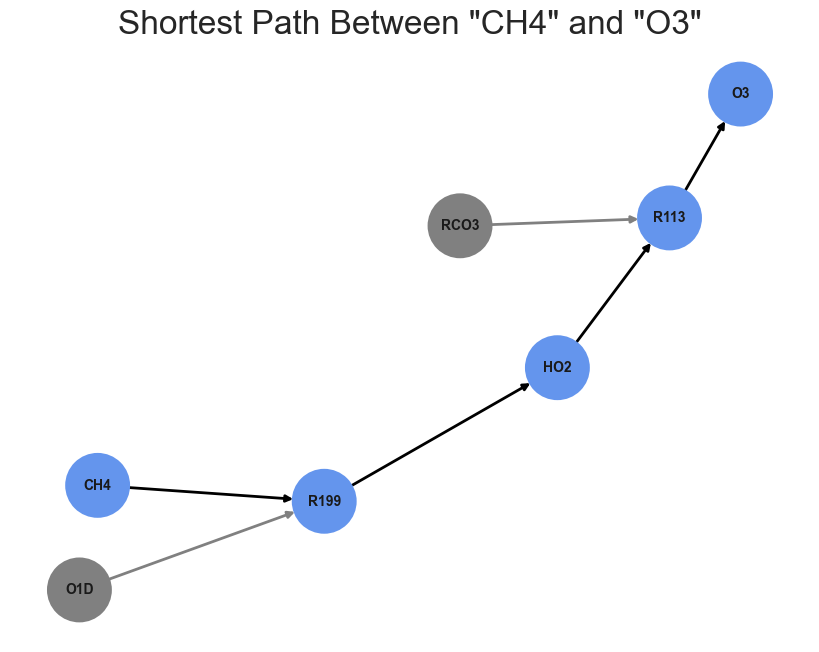

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the shortest path
shortest_path_smth_methane = nx.shortest_path(B, source='CH4', target='O3', weight='timescale')

# directed graph for the shortest path
shortest_path_graph = nx.DiGraph()
shortest_path_edges = [
    (shortest_path_smth_methane[i], shortest_path_smth_methane[i + 1]) 
    for i in range(len(shortest_path_smth_methane) - 1)
]
shortest_path_graph.add_edges_from(shortest_path_edges)

# find the edges of index 1 and index 3 of shortest_path_smth_methane
r1_edges = B.in_edges(shortest_path_smth_methane[1])
r2_edges = B.in_edges(shortest_path_smth_methane[3])

shortest_path_graph.add_edges_from(r1_edges)
shortest_path_graph.add_edges_from(r2_edges)




sns.set_context("poster")
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(shortest_path_graph, seed=1) 
node_color = (['cornflowerblue']*5)+(['grey']*2)
edge_color = (['black']*4)+(['grey']*2)

nx.draw(
    shortest_path_graph, pos, 
    with_labels=True, 
    node_size=2000, 
    node_color=node_color,
    edge_color=edge_color,
    font_size=10, 
    font_weight='bold', 
    width=2, 
    arrows=True, 
    arrowsize=10
)

plt.title('Shortest Path Between "CH4" and "O3"')
plt.savefig('DirectedShortestPath.png', dpi=300)
plt.show()

In [60]:
r1_edges = B.in_edges(shortest_path_smth_methane[1])
r1_edges

InEdgeDataView([('CH4', 'R199'), ('O1D', 'R199')])

In [59]:
r2_edges = B.in_edges(shortest_path_smth_methane[3])
r2_edges

InEdgeDataView([('RCO3', 'R113'), ('HO2', 'R113')])

In [62]:
print(shortest_path_graph.add_edges_from(r1_edges))

None


In [67]:
print(shortest_path_graph.add_edges_from(r1_edges))
shortest_path_graph

None


In [80]:
node_color = (['cornflowerblue']*5)+(['grey']*2)
node_color

['cornflowerblue',
 'cornflowerblue',
 'cornflowerblue',
 'cornflowerblue',
 'cornflowerblue',
 'grey',
 'grey']